<a href="https://colab.research.google.com/github/vkunal1996/Airport-Reviews-Analysis/blob/master/Airline_Quality_Service.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Airline Quality Service Analysis**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install pydrive

    100% |████████████████████████████████| 993kB 22.3MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built pydrive


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link='https://drive.google.com/open?id=1tmzZKQKEvxt61TxjHchFfJkpqklVgdzP'
fluff,id=link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('airline.csv')  
airline_data = pd.read_csv('airline.csv')

In [98]:
airline_data=pd.read_csv('airline.csv')
airline_data.head(1)

airline_name                            link  \
0  adria-airways  /airline-reviews/adria-airways   

                           title author author_country        date  \
0  Adria Airways customer review  D Ito        Germany  2015-04-10   

                                             content aircraft type_traveller  \
0  Outbound flight FRA/PRN A319. 2 hours 10 min f...      NaN            NaN   

  cabin_flown route  overall_rating  seat_comfort_rating  cabin_staff_rating  \
0     Economy   NaN             7.0                  4.0                 4.0   

   food_beverages_rating  inflight_entertainment_rating  \
0                    4.0                            0.0   

   ground_service_rating  wifi_connectivity_rating  value_money_rating  \
0                    NaN                       NaN                 4.0   

   recommended  
0            1

In [99]:
rev=airline_data.content
rev.to_csv('r_review.csv')

c:\users\kunalverma\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


# **Analysing the DataSet**

In [3]:
round((airline_data.isna().sum())/len(airline_data),2)

airline_name                     0.00
link                             0.00
title                            0.00
author                           0.00
author_country                   0.04
date                             0.00
content                          0.00
aircraft                         0.97
type_traveller                   0.94
cabin_flown                      0.07
route                            0.94
overall_rating                   0.11
seat_comfort_rating              0.19
cabin_staff_rating               0.19
food_beverages_rating            0.20
inflight_entertainment_rating    0.25
ground_service_rating            0.95
wifi_connectivity_rating         0.99
value_money_rating               0.04
recommended                      0.00
dtype: float64

In [4]:
airline_data=airline_data[airline_data['overall_rating'].notnull()]

In [5]:
round((airline_data.isna().sum())/len(airline_data),2)

airline_name                     0.00
link                             0.00
title                            0.00
author                           0.00
author_country                   0.02
date                             0.00
content                          0.00
aircraft                         0.97
type_traveller                   0.94
cabin_flown                      0.05
route                            0.94
overall_rating                   0.00
seat_comfort_rating              0.17
cabin_staff_rating               0.17
food_beverages_rating            0.18
inflight_entertainment_rating    0.23
ground_service_rating            0.94
wifi_connectivity_rating         0.98
value_money_rating               0.03
recommended                      0.00
dtype: float64

# **Calcluating Total Reviews to Each airline**

In [6]:

airline_names=airline_data.airline_name.unique()
print('Total airlines Considered for Analysis : ',len(airline_names))
total_reviews_each_airline=[]
for i in airline_names:
  temp=airline_data[airline_data.airline_name==i]
  total_reviews_each_airline.append(len(temp))
result=list(zip(airline_names,total_reviews_each_airline))
print('Total Reviews Analysed : ',sum(total_reviews_each_airline))

Total airlines Considered for Analysis :  357
Total Reviews Analysed :  36861


In [7]:
df=pd.DataFrame(result,columns=['Airline_Name','Total_Reviews'])
df=df.sort_values(by='Total_Reviews',ascending=False)
df.head()

Airline_Name  Total_Reviews
295   spirit-airlines            966
97    british-airways            896
333   united-airlines            839
20   air-canada-rouge            715
138          emirates            690

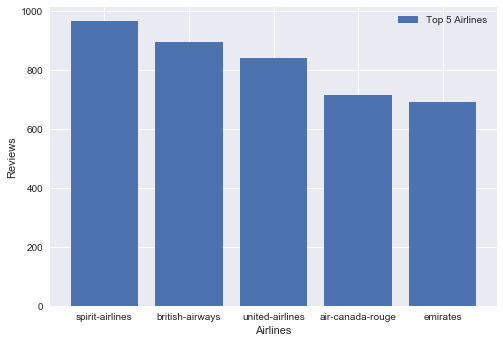

In [8]:
plt.style.use('seaborn')
plt.xlabel('Airlines')
plt.ylabel('Reviews')
plt.bar(df.Airline_Name[:5],df.Total_Reviews[:5],label='Top 5 Airlines')
plt.legend()


# **Finding Polarity of Each Review**

In [9]:
from textblob import TextBlob

In [10]:
result1=[]
num=1
numlist=[]
for review in airline_data.content:
    analysis=TextBlob(review)
    result1.append(analysis.polarity)
    numlist.append(num)
    num=num+1
result1=np.array(result1)


### **Plotting Polarity**

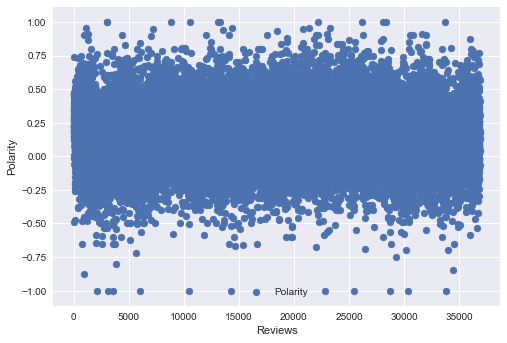

In [11]:
plt.style.use('seaborn')
plt.scatter(numlist,result1,label='Polarity')
plt.xlabel('Reviews')
plt.ylabel('Polarity')
plt.legend()

# **Generating Word Cloud**

In [12]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text=''

for i in airline_data.content:
  text=text+i+' '

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

(-0.5, 2718.5, 944.5, -0.5)

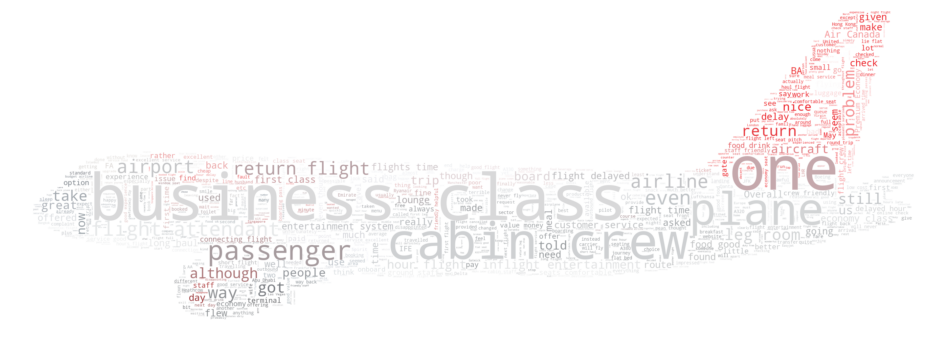

In [0]:
from PIL import Image
import requests
from io import BytesIO
response = requests.get("http://www.pngmart.com/files/7/Modern-Plane-PNG-HD.png")

mask = np.array(Image.open(BytesIO(response.content)))
wordcloud_fra = WordCloud(background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[16,16])
plt.imshow(wordcloud_fra.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")


# **Providing Sentiment Value to Each Review According to Rating**

In [78]:
sentiment=[]
for i in airline_data.overall_rating:
  if(i<=4 and i>=0):
    sentiment.append(-1)
  elif (i==5 or i==6):
    sentiment.append(0)
  elif(i>=7):
    sentiment.append(1)

### **Sentiment from polarity**

In [14]:
sentiment=[]
for i in result1:
  if (i>0):
    sentiment.append(1)
  elif (i<0):
    sentiment.append(-1)
  elif (i==0):
    sentiment.append(0)

In [79]:
new_airline_data=airline_data.copy()

In [80]:
new_airline_data['sentiment']=sentiment

In [81]:
### Shuffline the Dataset for Training ###

from sklearn.utils import shuffle
new_airline_data=shuffle(new_airline_data)

<BarContainer object of 3 artists>

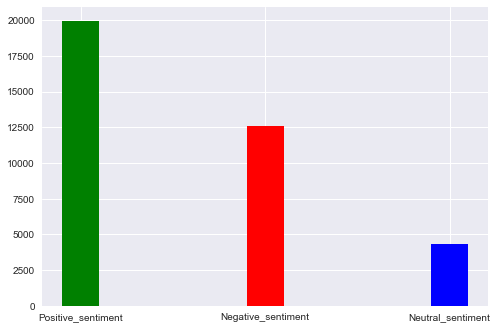

In [82]:
positive_sentiment_count=new_airline_data[new_airline_data['sentiment']==1]
negative_sentiment_count=new_airline_data[new_airline_data['sentiment']==-1]
neutral_sentiment_count=new_airline_data[new_airline_data['sentiment']==0]

temp_array=[len(positive_sentiment_count),len(negative_sentiment_count),len(neutral_sentiment_count)]
x_axis_labels=['Positive_sentiment','Negative_sentiment','Neutral_sentiment']
plt.bar(x_axis_labels,temp_array,color=('green','red','blue'),width=(0.2,0.2,0.2))

# **Logisitc Regression**

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

In [84]:
model=LogisticRegression()
vectorizer=CountVectorizer(ngram_range=(1,2))
x_l=vectorizer.fit_transform(new_airline_data.content.values)

In [85]:
model.fit(x_l[:29488],new_airline_data.sentiment[:29488].values)

c:\users\kunalverma\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kunalverma\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [48]:
tempo=TextBlob('Smart and efficient service. Small planes but as a tall man (6ft 4) I did not feel cramped either on the CRJ-200 (AMS-LJU) or the CRJ-900 (LJU-AMS). The cabin crew were friendly and the food for such a short flight was good. Also the price was right.')
print(tempo.subjectivity)

0.49693877551020404


In [52]:
# from textblob.classifiers import NaiveBayesClassifier
# cl = NaiveBayesClassifier(new_airline_data.content)

In [86]:
model.score(x_l[29488:],new_airline_data.sentiment[29488:].values)

0.8084904380849044

In [90]:
text='Worst Quality Clothes'
t=vectorizer.transform([text])
model.predict(t)

array([-1], dtype=int64)

In [0]:
y_predict=model.predict(x_l[29488:])

In [0]:
x_axis=[]
n=1
for i in range(0,len(new_airline_data[29488:].values)):
  x_axis.append(n)
  n=n+1

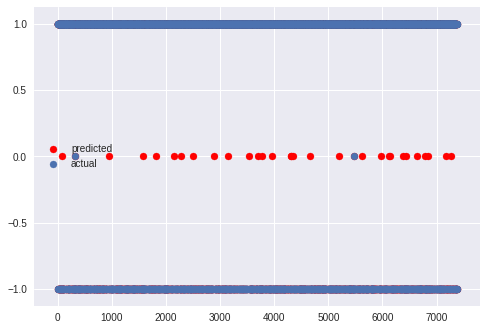

In [28]:
plt.scatter(x_axis,new_airline_data.sentiment[29488:],color='red',label='predicted')
plt.scatter(x_axis,y_predict,label='actual')
plt.legend(loc='best')


# **Linear Support Vector Machine**

In [0]:
from sklearn.svm import LinearSVC

In [0]:
clf = LinearSVC(random_state=42, tol=1e-5)

In [31]:
clf.fit(x_l[:29488],new_airline_data.sentiment[:29488])

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=1e-05,
     verbose=0)

In [32]:
clf.score(x_l[29488:],new_airline_data.sentiment[29488:])

0.9152312491523125

In [0]:
y_predict1=clf.predict(x_l[29488:])

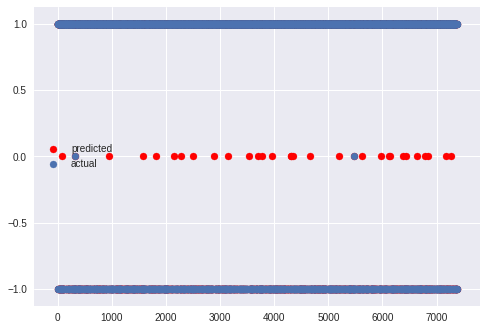

In [71]:
plt.scatter(x_axis,new_airline_data.sentiment[29488:],color='red',label='predicted')
plt.scatter(x_axis,y_predict1,label='actual')
plt.legend()


# **Preprocessing the Reviews **

In [23]:
t=new_airline_data.copy()

In [25]:
pos_sentiment=[]
neg_sentiment=[]
net_sentiment=[]
avg_rating=[]
for i in airline_names:
  tempdf=t[t['airline_name']==i]
  pos=len(tempdf[tempdf['sentiment']==1])
  neg=len(tempdf[tempdf['sentiment']==-1])
  net=len(tempdf[tempdf['sentiment']==0])
  pos_sentiment.append(pos)
  neg_sentiment.append(neg)
  net_sentiment.append(net)
  avg_rate=tempdf.overall_rating.mean()
  avg_rating.append(avg_rate)
clustered_data=pd.DataFrame(list(zip(airline_names,avg_rating,pos_sentiment,net_sentiment,neg_sentiment)),columns=['airline_name','average_rating','pos_sentiment','net_sentiment','neg_sentiment'])

In [26]:
clustered_data=clustered_data.sort_values(by=['pos_sentiment','average_rating'],kind='mergesort',ascending=False)

In [27]:
clustered_data.head()

airline_name  average_rating  pos_sentiment  net_sentiment  \
97   british-airways        5.881696            703              2   
138         emirates        6.246377            558              1   
295  spirit-airlines        2.902692            556             15   
333  united-airlines        3.356377            523              5   
215        lufthansa        6.993333            511              1   

     neg_sentiment  
97             191  
138            131  
295            395  
333            311  
215             88

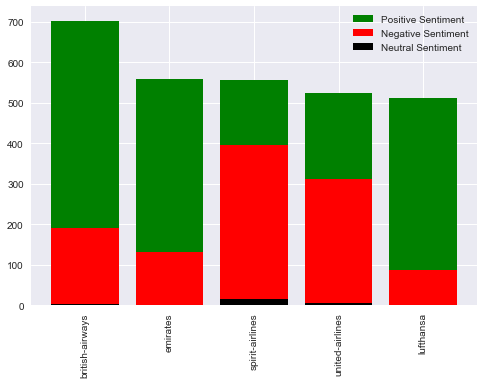

In [30]:
plt.figure()
plt.bar(clustered_data.airline_name.head(5).values,clustered_data.pos_sentiment.head(5).values,label='Positive Sentiment',color='green')
plt.bar(clustered_data.airline_name.head(5).values,clustered_data.neg_sentiment.head(5).values,label='Negative Sentiment',color='red')
plt.bar(clustered_data.airline_name.head(5).values,clustered_data.net_sentiment.head(5).values,label='Neutral Sentiment',color='black')
plt.xticks(rotation=90)
plt.legend()
plt.savefig('senitmentgrapg.png')

# **Preprocessing Reviews and Removing Stop Words**


In [31]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
import string
from nltk.tokenize import word_tokenize

In [32]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kunalverma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kunalverma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kunalverma\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [46]:
stop = set(stopwords.words("english"))

In [35]:
# sentence_reviews=new_airline_data.content.values

In [45]:
# mytokens=nltk.word_tokenize(sentence_reviews[0])
# mytokens
# tagged=nltk.pos_tag(mytokens)
# entites=nltk.chunk.ne_chunk(tagged)
# entites

In [0]:
def preprocessing(text):
  le = WordNetLemmatizer()
  words = word_tokenize(text)
  words = [x for x in words if not x in stop]
  words = [le.lemmatize(x) for x in words]
  return " ".join(words)

In [0]:
reviews2 = [preprocessing(x) for x in new_airline_data.content]

In [0]:
new_airline_data['reviews_processed']=reviews2

### **Logisitic Regression on Processed Data**

In [0]:
logic_model=LogisticRegression()
vectorizer_p=CountVectorizer(ngram_range=(1,2))
x_l_1=vectorizer_p.fit_transform(new_airline_data.reviews_processed.values)

In [56]:
logic_model.fit(x_l_1[:29488],new_airline_data.sentiment[:29488].values)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [57]:
logic_model.score(x_l_1[29488:],new_airline_data.sentiment[29488:].values)

0.9115692391156924

### **Implementing Linear SVM**

In [0]:
clf1 = LinearSVC(random_state=42, tol=1e-5)

In [59]:
clf1.fit(x_l_1[:29488],new_airline_data.sentiment[:29488])

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=1e-05,
     verbose=0)

In [60]:
clf1.score(x_l_1[29488:],new_airline_data.sentiment[29488:]) 

0.9092635290926353

# **Working With Neural Networks**

In [0]:
new_airline_data.head(1)

airline_name                                 link  \
31578  singapore-airlines  /airline-reviews/singapore-airlines   

                                    title    author author_country  \
31578  Singapore Airlines customer review  A Turner      Australia   

             date                                            content aircraft  \
31578  2014-01-09  Flew economy from Frankfurt to Singapore. Food...      NaN   

      type_traveller cabin_flown  \
31578            NaN     Economy   

                             ...                         seat_comfort_rating  \
31578                        ...                                         4.0   

       cabin_staff_rating  food_beverages_rating  \
31578                 5.0                    4.0   

       inflight_entertainment_rating  ground_service_rating  \
31578                            4.0                    NaN   

       wifi_connectivity_rating  value_money_rating  recommended  sentiment  \
31578                       NaN                 5.0            1          1   

                                       reviews_processed  
31578  Flew economy Frankfurt Singapore . Food decent...  

[1 rows x 22 columns]

In [0]:
reviews_array=np.array(new_airline_data.content)

In [0]:
sentiment_array=np.array(new_airline_data.sentiment)

In [0]:
from keras.datasets import imdb
from keras.layers import Dense,Conv1D,MaxPool1D,Embedding,Flatten,Dropout,GRU,LSTM
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import OneHotEncoder
from keras.optimizers import Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
token=Tokenizer()
token.fit_on_texts(reviews_array) 
vocab_size=len(token.word_index) +1
print(vocab_size)

37678


In [0]:
l = 0
for i in reviews_array:
  l += len(i)
  
avg_length = l/len(reviews_array)
review_training = [x[:int(avg_length)] for x in reviews_array]


In [0]:
# encoded = token.texts_to_sequences(reviews_array)
# l = []
# for i in encoded:
#   l.append(len(i))
# print(l/len(encoded))

In [0]:
padded_docs = pad_sequences(encoded, maxlen=38, padding='post')

## **LSTM**

In [0]:
n_model1 = Sequential()
n_model1.add(Embedding(37678,64,input_length=38))
n_model1.add(LSTM(64, activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', unit_forget_bias=True, kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, implementation=1, return_sequences=True, return_state=False, go_backwards=False, stateful=False, unroll=False))
n_model1.add(Dropout(0.5))
n_model1.add(LSTM(64,return_sequences=False))
n_model1.add(Dropout(0.5))
n_model1.add(Dense(1,activation="sigmoid"))
n_model1.summary()
n_model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 38, 64)            2411392   
_________________________________________________________________
lstm_3 (LSTM)                (None, 38, 64)            33024     
_________________________________________________________________
dropout_3 (Dropout)          (None, 38, 64)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 2,477,505
Trainable params: 2,477,505
Non-trainable params: 0
_________________________________________________________________


In [0]:
hist = n_model1.fit(padded_docs,sentiment_array,epochs=5,batch_size=100,validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 29488 samples, validate on 7373 samples
Epoch 1/5
29488/29488 [==============================] - 40s 1ms/step - loss: 0.4716 - acc: 0.7725 - val_loss: 0.4018 - val_acc: 0.8283
Epoch 2/5
29488/29488 [==============================] - 38s 1ms/step - loss: 0.3562 - acc: 0.8549 - val_loss: 0.4038 - val_acc: 0.8204
Epoch 3/5
29488/29488 [==============================] - 37s 1ms/step - loss: 0.2973 - acc: 0.8836 - val_loss: 0.4231 - val_acc: 0.8142
Epoch 4/5
29488/29488 [==============================] - 37s 1ms/step - loss: 0.2439 - acc: 0.9078 - val_loss: 0.4939 - val_acc: 0.8013
Epoch 5/5
29488/29488 [==============================] - 36s 1ms/step - loss: 0.1928 - acc: 0.9301 - val_loss: 0.5099 - val_acc: 0.7991


## **CNN**

In [0]:
n_model2 = Sequential()
n_model2.add(Embedding(37678,100,input_length=38))
n_model2.add(Conv1D(filters=64,kernel_size=3))
n_model2.add(MaxPool1D(pool_size=3))
n_model2.add(Flatten())
n_model2.add(Dense(64,activation="relu"))
n_model2.add(Dropout(rate = 0.2))
n_model2.add(Dense(1,activation="sigmoid"))
n_model2.summary()
adm = Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
n_model2.compile(loss='binary_crossentropy', optimizer=adm, metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 38, 100)           3767800   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 36, 64)            19264     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 12, 64)            0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 768)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                49216     
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total para

In [0]:
hist = n_model2.fit(padded_docs,sentiment_array,epochs=100,batch_size=100,validation_split=0.1)

Train on 33174 samples, validate on 3687 samples
Epoch 1/100
33174/33174 [==============================] - 23s 688us/step - loss: 0.6859 - acc: 0.5677 - val_loss: 0.6800 - val_acc: 0.5837
Epoch 2/100
33174/33174 [==============================] - 22s 654us/step - loss: 0.6750 - acc: 0.5908 - val_loss: 0.6750 - val_acc: 0.5837
Epoch 3/100
33174/33174 [==============================] - 22s 660us/step - loss: 0.6706 - acc: 0.5908 - val_loss: 0.6711 - val_acc: 0.5837
Epoch 4/100
33174/33174 [==============================] - 22s 666us/step - loss: 0.6650 - acc: 0.5908 - val_loss: 0.6655 - val_acc: 0.5837
Epoch 5/100
33174/33174 [==============================] - 22s 650us/step - loss: 0.6575 - acc: 0.5908 - val_loss: 0.6567 - val_acc: 0.5837
Epoch 6/100
33174/33174 [==============================] - 22s 650us/step - loss: 0.6460 - acc: 0.5915 - val_loss: 0.6425 - val_acc: 0.5891
Epoch 7/100
33174/33174 [==============================] - 23s 680us/step - loss: 0.6284 - acc: 0.6121 - val_lo

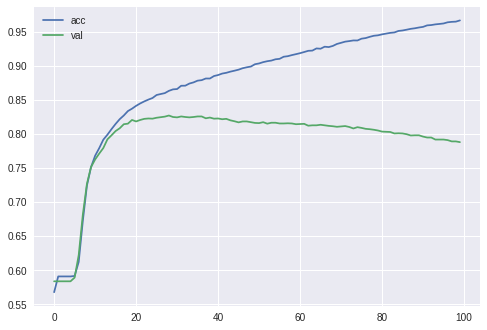

In [0]:
plt.plot(hist.history["acc"],label="acc")
plt.plot(hist.history["val_acc"],label="val")
plt.legend()

In [0]:
model_conv = Sequential()
model_conv.add(Embedding(vocab_size, 100, input_length=38))
model_conv.add(Dropout(0.2))
model_conv.add(Conv1D(64, 5, activation='relu'))
model_conv.add(MaxPool1D(pool_size=4))
model_conv.add(LSTM(100))
model_conv.add(Dense(1, activation='sigmoid'))
adm = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model_conv.compile(loss='binary_crossentropy', optimizer=adm,    metrics=['accuracy'])
model_conv.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 38, 100)           3767800   
_________________________________________________________________
dropout_9 (Dropout)          (None, 38, 100)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 34, 64)            32064     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 8, 64)             0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 100)               66000     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 101       
Total params: 3,865,965
Trainable params: 3,865,965
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_conv.fit(padded_docs,sentiment_array, validation_split=0.2, epochs = 10)

Train on 29488 samples, validate on 7373 samples
Epoch 1/10
29488/29488 [==============================] - 73s 2ms/step - loss: 0.5655 - acc: 0.6930 - val_loss: 0.4516 - val_acc: 0.7951
Epoch 2/10
29488/29488 [==============================] - 71s 2ms/step - loss: 0.4169 - acc: 0.8122 - val_loss: 0.4189 - val_acc: 0.8088
Epoch 3/10
29488/29488 [==============================] - 72s 2ms/step - loss: 0.3694 - acc: 0.8420 - val_loss: 0.4149 - val_acc: 0.8150
Epoch 4/10
29488/29488 [==============================] - 70s 2ms/step - loss: 0.3337 - acc: 0.8600 - val_loss: 0.4201 - val_acc: 0.8107
Epoch 5/10
29488/29488 [==============================] - 71s 2ms/step - loss: 0.3034 - acc: 0.8761 - val_loss: 0.4287 - val_acc: 0.8085
Epoch 6/10
29488/29488 [==============================] - 71s 2ms/step - loss: 0.2734 - acc: 0.8903 - val_loss: 0.4478 - val_acc: 0.8056
Epoch 7/10
29488/29488 [==============================] - 70s 2ms/step - loss: 0.2396 - acc: 0.9064 - val_loss: 0.4779 - val_acc:

# **Features Passengers Concerned About **

In [0]:
lower_reviews=new_airline_data.content.str.lower()

In [0]:
features=['','security','check-in','facilities','people','passport','arrival','waiting','access']
x=np.array([1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0])

In [0]:
new_airline_data['lower_reviews']=lower_reviews

In [0]:
avg_pos=[]
avg_neg=[]
avg_net=[]
for feature in features:
  temp=new_airline_data[new_airline_data.lower_reviews.str.contains(feature)]
  avg_pos.append(len(temp[temp.sentiment==1]))
  avg_net.append(len(temp[temp.sentiment==0]))
  avg_neg.append(len(temp[temp.sentiment==-1]))

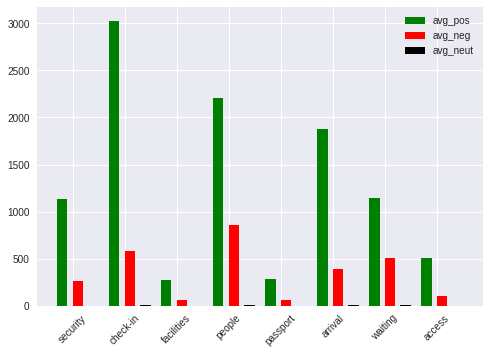

In [172]:
w=0.2
fig,ax=plt.subplots()
plt.bar(x-0.2,avg_pos,color='green',width=(0.2),label='avg_pos')
plt.bar(x+0.1,avg_neg,color='red',width=(0.2),label='avg_neg')
plt.bar(x+0.4,avg_net,color='black',width=0.2,label='avg_neut')
plt.xticks(rotation=45)
ax.set_xticklabels(features)
plt.legend(loc='best')

# Aspect Based Sentiment analysis

In [94]:
airline_group=new_airline_data.groupby('airline_name')

In [96]:
for airline_name in airline_group:
    print(airline_name)

('adria-airways',      airline_name                            link  \
19  adria-airways  /airline-reviews/adria-airways   
28  adria-airways  /airline-reviews/adria-airways   
32  adria-airways  /airline-reviews/adria-airways   
18  adria-airways  /airline-reviews/adria-airways   
7   adria-airways  /airline-reviews/adria-airways   
22  adria-airways  /airline-reviews/adria-airways   
11  adria-airways  /airline-reviews/adria-airways   
31  adria-airways  /airline-reviews/adria-airways   
25  adria-airways  /airline-reviews/adria-airways   
12  adria-airways  /airline-reviews/adria-airways   
24  adria-airways  /airline-reviews/adria-airways   
30  adria-airways  /airline-reviews/adria-airways   
15  adria-airways  /airline-reviews/adria-airways   
26  adria-airways  /airline-reviews/adria-airways   
23  adria-airways  /airline-reviews/adria-airways   
29  adria-airways  /airline-reviews/adria-airways   
9   adria-airways  /airline-reviews/adria-airways   
10  adria-airways  /airline-

('aerocaribbean',       airline_name                            link  \
120  aerocaribbean  /airline-reviews/aerocaribbean   
121  aerocaribbean  /airline-reviews/aerocaribbean   
122  aerocaribbean  /airline-reviews/aerocaribbean   

                             title         author  author_country        date  \
120  Aerocaribbean customer review  Philip Jensen         Denmark  2010-12-31   
121  Aerocaribbean customer review        R Ryder  United Kingdom  2010-11-25   
122  Aerocaribbean customer review  Ian Hopkinson             NaN  2008-04-10   

                                               content aircraft  \
120  Havana - Cayo Coco return. A one hour flight w...      NaN   
121  Holguin to Havana last week. Okay apart from i...      NaN   
122  What a wonderful friendly airline. Flew with t...      NaN   

    type_traveller cabin_flown  ... overall_rating  seat_comfort_rating  \
120            NaN     Economy  ...            8.0                  NaN   
121            NaN   

('air-arabia',     airline_name                         link                       title  \
710   air-arabia  /airline-reviews/air-arabia  Air Arabia customer review   
783   air-arabia  /airline-reviews/air-arabia  Air Arabia customer review   
759   air-arabia  /airline-reviews/air-arabia  Air Arabia customer review   
735   air-arabia  /airline-reviews/air-arabia  Air Arabia customer review   
760   air-arabia  /airline-reviews/air-arabia  Air Arabia customer review   
811   air-arabia  /airline-reviews/air-arabia  Air Arabia customer review   
785   air-arabia  /airline-reviews/air-arabia  Air Arabia customer review   
810   air-arabia  /airline-reviews/air-arabia  Air Arabia customer review   
732   air-arabia  /airline-reviews/air-arabia  Air Arabia customer review   
813   air-arabia  /airline-reviews/air-arabia  Air Arabia customer review   
757   air-arabia  /airline-reviews/air-arabia  Air Arabia customer review   
834   air-arabia  /airline-reviews/air-arabia  Air Arabia cus

('air-blue',      airline_name                       link                    title  \
5513     air-blue  /airline-reviews/air-blue  airblue customer review   
5448     air-blue  /airline-reviews/air-blue  airblue customer review   
5428     air-blue  /airline-reviews/air-blue  airblue customer review   
5514     air-blue  /airline-reviews/air-blue  airblue customer review   
5427     air-blue  /airline-reviews/air-blue  airblue customer review   
5534     air-blue  /airline-reviews/air-blue  airblue customer review   
5511     air-blue  /airline-reviews/air-blue  airblue customer review   
5472     air-blue  /airline-reviews/air-blue  airblue customer review   
5492     air-blue  /airline-reviews/air-blue  airblue customer review   
5490     air-blue  /airline-reviews/air-blue  airblue customer review   
5533     air-blue  /airline-reviews/air-blue  airblue customer review   
5429     air-blue  /airline-reviews/air-blue  airblue customer review   
5512     air-blue  /airline-reviews/ai

[490 rows x 21 columns])
('air-canada-rouge',           airline_name                               link  \
2135  air-canada-rouge  /airline-reviews/air-canada-rouge   
3541  air-canada-rouge  /airline-reviews/air-canada-rouge   
2175  air-canada-rouge  /airline-reviews/air-canada-rouge   
2163  air-canada-rouge  /airline-reviews/air-canada-rouge   
1920  air-canada-rouge  /airline-reviews/air-canada-rouge   
3141  air-canada-rouge  /airline-reviews/air-canada-rouge   
1985  air-canada-rouge  /airline-reviews/air-canada-rouge   
2432  air-canada-rouge  /airline-reviews/air-canada-rouge   
1712  air-canada-rouge  /airline-reviews/air-canada-rouge   
2595  air-canada-rouge  /airline-reviews/air-canada-rouge   
2533  air-canada-rouge  /airline-reviews/air-canada-rouge   
2671  air-canada-rouge  /airline-reviews/air-canada-rouge   
2763  air-canada-rouge  /airline-reviews/air-canada-rouge   
2144  air-canada-rouge  /airline-reviews/air-canada-rouge   
1930  air-canada-rouge  /airline-review

('air-europa',      airline_name                         link                       title  \
3315   air-europa  /airline-reviews/air-europa  Air Europa customer review   
3608   air-europa  /airline-reviews/air-europa  Air Europa customer review   
3325   air-europa  /airline-reviews/air-europa  Air Europa customer review   
3610   air-europa  /airline-reviews/air-europa  Air Europa customer review   
3696   air-europa  /airline-reviews/air-europa  Air Europa customer review   
3704   air-europa  /airline-reviews/air-europa  Air Europa customer review   
3488   air-europa  /airline-reviews/air-europa  Air Europa customer review   
3518   air-europa  /airline-reviews/air-europa  Air Europa customer review   
3562   air-europa  /airline-reviews/air-europa  Air Europa customer review   
3277   air-europa  /airline-reviews/air-europa  Air Europa customer review   
3366   air-europa  /airline-reviews/air-europa  Air Europa customer review   
3380   air-europa  /airline-reviews/air-europa  A

('air-labrador',       airline_name                           link  \
3833  air-labrador  /airline-reviews/air-labrador   

                             title          author author_country        date  \
3833  Air Labrador customer review  John Attersley         Canada  2013-11-14   

                                                content aircraft  \
3833  Rigolet Labrador to Goose Bay Labrador on 13 O...      NaN   

     type_traveller cabin_flown  ... overall_rating  seat_comfort_rating  \
3833            NaN     Economy  ...            2.0                  3.0   

      cabin_staff_rating  food_beverages_rating  \
3833                 4.0                    0.0   

      inflight_entertainment_rating  ground_service_rating  \
3833                            0.0                    NaN   

      wifi_connectivity_rating  value_money_rating  recommended  sentiment  
3833                       NaN                 4.0            1         -1  

[1 rows x 21 columns])
('air-macau',    

('air-memphis',      airline_name                          link                        title  \
4305  air-memphis  /airline-reviews/air-memphis  Air Memphis customer review   
4324  air-memphis  /airline-reviews/air-memphis  Air Memphis customer review   
4265  air-memphis  /airline-reviews/air-memphis  Air Memphis customer review   
4286  air-memphis  /airline-reviews/air-memphis  Air Memphis customer review   
4322  air-memphis  /airline-reviews/air-memphis  Air Memphis customer review   
4285  air-memphis  /airline-reviews/air-memphis  Air Memphis customer review   
4247  air-memphis  /airline-reviews/air-memphis  Air Memphis customer review   
4323  air-memphis  /airline-reviews/air-memphis  Air Memphis customer review   
4248  air-memphis  /airline-reviews/air-memphis  Air Memphis customer review   
4325  air-memphis  /airline-reviews/air-memphis  Air Memphis customer review   
4284  air-memphis  /airline-reviews/air-memphis  Air Memphis customer review   
4321  air-memphis  /airl

('air-namibia',      airline_name                          link                        title  \
4546  air-namibia  /airline-reviews/air-namibia  Air Namibia customer review   
4494  air-namibia  /airline-reviews/air-namibia  Air Namibia customer review   
4530  air-namibia  /airline-reviews/air-namibia  Air Namibia customer review   
4480  air-namibia  /airline-reviews/air-namibia  Air Namibia customer review   
4529  air-namibia  /airline-reviews/air-namibia  Air Namibia customer review   
4511  air-namibia  /airline-reviews/air-namibia  Air Namibia customer review   
4464  air-namibia  /airline-reviews/air-namibia  Air Namibia customer review   
4493  air-namibia  /airline-reviews/air-namibia  Air Namibia customer review   
4418  air-namibia  /airline-reviews/air-namibia  Air Namibia customer review   
4568  air-namibia  /airline-reviews/air-namibia  Air Namibia customer review   
4549  air-namibia  /airline-reviews/air-namibia  Air Namibia customer review   
4436  air-namibia  /airl

('air-serbia',      airline_name                         link                       title  \
4758   air-serbia  /airline-reviews/air-serbia  Air Serbia customer review   
4871   air-serbia  /airline-reviews/air-serbia  Air Serbia customer review   
4763   air-serbia  /airline-reviews/air-serbia  Air Serbia customer review   
4831   air-serbia  /airline-reviews/air-serbia  Air Serbia customer review   
4771   air-serbia  /airline-reviews/air-serbia  Air Serbia customer review   
4852   air-serbia  /airline-reviews/air-serbia  Air Serbia customer review   
4800   air-serbia  /airline-reviews/air-serbia  Air Serbia customer review   
4854   air-serbia  /airline-reviews/air-serbia  Air Serbia customer review   
4832   air-serbia  /airline-reviews/air-serbia  Air Serbia customer review   
4821   air-serbia  /airline-reviews/air-serbia  Air Serbia customer review   
4784   air-serbia  /airline-reviews/air-serbia  Air Serbia customer review   
4908   air-serbia  /airline-reviews/air-serbia  A

('air-transat',      airline_name                          link                        title  \
6447  air-transat  /airline-reviews/air-transat  Air Transat customer review   
6203  air-transat  /airline-reviews/air-transat  Air Transat customer review   
5897  air-transat  /airline-reviews/air-transat  Air Transat customer review   
6153  air-transat  /airline-reviews/air-transat  Air Transat customer review   
5261  air-transat  /airline-reviews/air-transat  Air Transat customer review   
5545  air-transat  /airline-reviews/air-transat  Air Transat customer review   
6121  air-transat  /airline-reviews/air-transat  Air Transat customer review   
5707  air-transat  /airline-reviews/air-transat  Air Transat customer review   
4988  air-transat  /airline-reviews/air-transat  Air Transat customer review   
5181  air-transat  /airline-reviews/air-transat  Air Transat customer review   
6375  air-transat  /airline-reviews/air-transat  Air Transat customer review   
6483  air-transat  /airl

('airasia-x',      airline_name                        link                      title  \
5452    airasia-x  /airline-reviews/airasia-x  AirAsia X customer review   
5814    airasia-x  /airline-reviews/airasia-x  AirAsia X customer review   
6090    airasia-x  /airline-reviews/airasia-x  AirAsia X customer review   
5431    airasia-x  /airline-reviews/airasia-x  AirAsia X customer review   
5787    airasia-x  /airline-reviews/airasia-x  AirAsia X customer review   
5753    airasia-x  /airline-reviews/airasia-x  AirAsia X customer review   
6124    airasia-x  /airline-reviews/airasia-x  AirAsia X customer review   
5559    airasia-x  /airline-reviews/airasia-x  AirAsia X customer review   
5202    airasia-x  /airline-reviews/airasia-x  AirAsia X customer review   
6057    airasia-x  /airline-reviews/airasia-x  AirAsia X customer review   
6143    airasia-x  /airline-reviews/airasia-x  AirAsia X customer review   
5773    airasia-x  /airline-reviews/airasia-x  AirAsia X customer review  

('alaska-airlines',          airline_name                              link  \
6746  alaska-airlines  /airline-reviews/alaska-airlines   
6440  alaska-airlines  /airline-reviews/alaska-airlines   
6592  alaska-airlines  /airline-reviews/alaska-airlines   
6489  alaska-airlines  /airline-reviews/alaska-airlines   
6299  alaska-airlines  /airline-reviews/alaska-airlines   
6683  alaska-airlines  /airline-reviews/alaska-airlines   
6438  alaska-airlines  /airline-reviews/alaska-airlines   
6231  alaska-airlines  /airline-reviews/alaska-airlines   
6212  alaska-airlines  /airline-reviews/alaska-airlines   
6283  alaska-airlines  /airline-reviews/alaska-airlines   
6621  alaska-airlines  /airline-reviews/alaska-airlines   
6724  alaska-airlines  /airline-reviews/alaska-airlines   
6133  alaska-airlines  /airline-reviews/alaska-airlines   
5849  alaska-airlines  /airline-reviews/alaska-airlines   
6424  alaska-airlines  /airline-reviews/alaska-airlines   
6654  alaska-airlines  /airline-revi

('american-airlines',            airline_name                                link  \
7987  american-airlines  /airline-reviews/american-airlines   
6953  american-airlines  /airline-reviews/american-airlines   
8325  american-airlines  /airline-reviews/american-airlines   
8195  american-airlines  /airline-reviews/american-airlines   
8246  american-airlines  /airline-reviews/american-airlines   
6980  american-airlines  /airline-reviews/american-airlines   
7971  american-airlines  /airline-reviews/american-airlines   
6970  american-airlines  /airline-reviews/american-airlines   
6990  american-airlines  /airline-reviews/american-airlines   
6869  american-airlines  /airline-reviews/american-airlines   
8369  american-airlines  /airline-reviews/american-airlines   
8352  american-airlines  /airline-reviews/american-airlines   
7068  american-airlines  /airline-reviews/american-airlines   
8453  american-airlines  /airline-reviews/american-airlines   
7539  american-airlines  /airline

[25 rows x 21 columns])
('arkefly',      airline_name                      link                    title  \
8269      arkefly  /airline-reviews/arkefly  Arkefly customer review   
8276      arkefly  /airline-reviews/arkefly  Arkefly customer review   
8217      arkefly  /airline-reviews/arkefly  Arkefly customer review   
8286      arkefly  /airline-reviews/arkefly  Arkefly customer review   
8243      arkefly  /airline-reviews/arkefly  Arkefly customer review   
8242      arkefly  /airline-reviews/arkefly  Arkefly customer review   
8244      arkefly  /airline-reviews/arkefly  Arkefly customer review   
8204      arkefly  /airline-reviews/arkefly  Arkefly customer review   
8277      arkefly  /airline-reviews/arkefly  Arkefly customer review   
8197      arkefly  /airline-reviews/arkefly  Arkefly customer review   
8257      arkefly  /airline-reviews/arkefly  Arkefly customer review   
8284      arkefly  /airline-reviews/arkefly  Arkefly customer review   
8237      arkefly  /airline-

('atlantic-airways',           airline_name                               link  \
8372  atlantic-airways  /airline-reviews/atlantic-airways   
8364  atlantic-airways  /airline-reviews/atlantic-airways   
8371  atlantic-airways  /airline-reviews/atlantic-airways   
8373  atlantic-airways  /airline-reviews/atlantic-airways   

                                 title       author  author_country  \
8372  Atlantic Airways customer review       M Vlad       Australia   
8364  Atlantic Airways customer review     S Kantor   United States   
8371  Atlantic Airways customer review  JK Petersen         Denmark   
8373  Atlantic Airways customer review     C Perkin  United Kingdom   

            date                                            content aircraft  \
8372  2012-06-17  CPH-FAE return new aircraft on time friendly a...      NaN   
8364  2013-12-23  I have flown Atlantic Airways numerous times b...      NaN   
8371  2012-10-25  Small company but very friendly and efficient ...      NaN 

('avianca',      airline_name                      link                    title  \
9062      avianca  /airline-reviews/avianca  Avianca customer review   
8872      avianca  /airline-reviews/avianca  Avianca customer review   
8633      avianca  /airline-reviews/avianca  Avianca customer review   
8670      avianca  /airline-reviews/avianca  Avianca customer review   
8962      avianca  /airline-reviews/avianca  Avianca customer review   
8643      avianca  /airline-reviews/avianca  Avianca customer review   
8888      avianca  /airline-reviews/avianca  Avianca customer review   
8613      avianca  /airline-reviews/avianca  Avianca customer review   
8604      avianca  /airline-reviews/avianca  Avianca customer review   
8765      avianca  /airline-reviews/avianca  Avianca customer review   
8998      avianca  /airline-reviews/avianca  Avianca customer review   
9095      avianca  /airline-reviews/avianca  Avianca customer review   
8773      avianca  /airline-reviews/avianca  Avianca

('bangkok-airways',          airline_name                              link  \
9430  bangkok-airways  /airline-reviews/bangkok-airways   
9271  bangkok-airways  /airline-reviews/bangkok-airways   
9443  bangkok-airways  /airline-reviews/bangkok-airways   
9514  bangkok-airways  /airline-reviews/bangkok-airways   
9401  bangkok-airways  /airline-reviews/bangkok-airways   
9609  bangkok-airways  /airline-reviews/bangkok-airways   
9069  bangkok-airways  /airline-reviews/bangkok-airways   
9115  bangkok-airways  /airline-reviews/bangkok-airways   
9402  bangkok-airways  /airline-reviews/bangkok-airways   
9102  bangkok-airways  /airline-reviews/bangkok-airways   
9336  bangkok-airways  /airline-reviews/bangkok-airways   
9423  bangkok-airways  /airline-reviews/bangkok-airways   
9281  bangkok-airways  /airline-reviews/bangkok-airways   
9471  bangkok-airways  /airline-reviews/bangkok-airways   
9684  bangkok-airways  /airline-reviews/bangkok-airways   
9433  bangkok-airways  /airline-revi

('blue-air',      airline_name                       link                     title  \
9561     blue-air  /airline-reviews/blue-air  Blue Air customer review   
9560     blue-air  /airline-reviews/blue-air  Blue Air customer review   
9576     blue-air  /airline-reviews/blue-air  Blue Air customer review   
9605     blue-air  /airline-reviews/blue-air  Blue Air customer review   
9552     blue-air  /airline-reviews/blue-air  Blue Air customer review   
9606     blue-air  /airline-reviews/blue-air  Blue Air customer review   
9568     blue-air  /airline-reviews/blue-air  Blue Air customer review   
9594     blue-air  /airline-reviews/blue-air  Blue Air customer review   
9586     blue-air  /airline-reviews/blue-air  Blue Air customer review   
9584     blue-air  /airline-reviews/blue-air  Blue Air customer review   
9603     blue-air  /airline-reviews/blue-air  Blue Air customer review   
9579     blue-air  /airline-reviews/blue-air  Blue Air customer review   
9577     blue-air  /airli

('bmi-regional',       airline_name                           link  \
9769  bmi-regional  /airline-reviews/bmi-regional   
9762  bmi-regional  /airline-reviews/bmi-regional   
9764  bmi-regional  /airline-reviews/bmi-regional   
9768  bmi-regional  /airline-reviews/bmi-regional   
9763  bmi-regional  /airline-reviews/bmi-regional   
9750  bmi-regional  /airline-reviews/bmi-regional   
9745  bmi-regional  /airline-reviews/bmi-regional   
9751  bmi-regional  /airline-reviews/bmi-regional   
9746  bmi-regional  /airline-reviews/bmi-regional   
9770  bmi-regional  /airline-reviews/bmi-regional   
9759  bmi-regional  /airline-reviews/bmi-regional   
9749  bmi-regional  /airline-reviews/bmi-regional   
9756  bmi-regional  /airline-reviews/bmi-regional   
9776  bmi-regional  /airline-reviews/bmi-regional   
9757  bmi-regional  /airline-reviews/bmi-regional   
9774  bmi-regional  /airline-reviews/bmi-regional   
9775  bmi-regional  /airline-reviews/bmi-regional   
9758  bmi-regional  /airline-

('brussels-airlines',             airline_name                                link  \
10357  brussels-airlines  /airline-reviews/brussels-airlines   
10314  brussels-airlines  /airline-reviews/brussels-airlines   
10184  brussels-airlines  /airline-reviews/brussels-airlines   
10145  brussels-airlines  /airline-reviews/brussels-airlines   
10156  brussels-airlines  /airline-reviews/brussels-airlines   
10321  brussels-airlines  /airline-reviews/brussels-airlines   
10295  brussels-airlines  /airline-reviews/brussels-airlines   
10360  brussels-airlines  /airline-reviews/brussels-airlines   
10059  brussels-airlines  /airline-reviews/brussels-airlines   
10179  brussels-airlines  /airline-reviews/brussels-airlines   
10039  brussels-airlines  /airline-reviews/brussels-airlines   
9971   brussels-airlines  /airline-reviews/brussels-airlines   
10258  brussels-airlines  /airline-reviews/brussels-airlines   
10060  brussels-airlines  /airline-reviews/brussels-airlines   
10287  brussels-ai

('canjet-airlines',           airline_name                              link  \
10726  canjet-airlines  /airline-reviews/canjet-airlines   
10745  canjet-airlines  /airline-reviews/canjet-airlines   
10805  canjet-airlines  /airline-reviews/canjet-airlines   
10714  canjet-airlines  /airline-reviews/canjet-airlines   
10701  canjet-airlines  /airline-reviews/canjet-airlines   
10636  canjet-airlines  /airline-reviews/canjet-airlines   
10682  canjet-airlines  /airline-reviews/canjet-airlines   
10761  canjet-airlines  /airline-reviews/canjet-airlines   
10802  canjet-airlines  /airline-reviews/canjet-airlines   
10786  canjet-airlines  /airline-reviews/canjet-airlines   
10781  canjet-airlines  /airline-reviews/canjet-airlines   
10658  canjet-airlines  /airline-reviews/canjet-airlines   
10812  canjet-airlines  /airline-reviews/canjet-airlines   
10640  canjet-airlines  /airline-reviews/canjet-airlines   
10659  canjet-airlines  /airline-reviews/canjet-airlines   
10641  canjet-airlin

('cayman-airways',          airline_name                             link  \
11684  cayman-airways  /airline-reviews/cayman-airways   
11685  cayman-airways  /airline-reviews/cayman-airways   
11682  cayman-airways  /airline-reviews/cayman-airways   
11677  cayman-airways  /airline-reviews/cayman-airways   
11683  cayman-airways  /airline-reviews/cayman-airways   

                                title         author author_country  \
11684  Cayman Airways customer review       K Tillon            NaN   
11685  Cayman Airways customer review  Graham Tilley            NaN   
11682  Cayman Airways customer review   Andre Franca         Brazil   
11677  Cayman Airways customer review      L Roestad         Norway   
11683  Cayman Airways customer review        F Plona            NaN   

             date                                            content aircraft  \
11684  2008-03-31  First I have to say that the delay at JFK was ...      NaN   
11685  2008-03-28  Miami-Grand Cayman-Miami

('china-eastern-airlines',                  airline_name                                     link  \
12386  china-eastern-airlines  /airline-reviews/china-eastern-airlines   
12318  china-eastern-airlines  /airline-reviews/china-eastern-airlines   
12601  china-eastern-airlines  /airline-reviews/china-eastern-airlines   
12170  china-eastern-airlines  /airline-reviews/china-eastern-airlines   
12523  china-eastern-airlines  /airline-reviews/china-eastern-airlines   
12054  china-eastern-airlines  /airline-reviews/china-eastern-airlines   
12111  china-eastern-airlines  /airline-reviews/china-eastern-airlines   
12560  china-eastern-airlines  /airline-reviews/china-eastern-airlines   
11997  china-eastern-airlines  /airline-reviews/china-eastern-airlines   
11877  china-eastern-airlines  /airline-reviews/china-eastern-airlines   
12670  china-eastern-airlines  /airline-reviews/china-eastern-airlines   
12500  china-eastern-airlines  /airline-reviews/china-eastern-airlines   
12494  chin

('condor-airlines',           airline_name                              link  \
12927  condor-airlines  /airline-reviews/condor-airlines   
13182  condor-airlines  /airline-reviews/condor-airlines   
13287  condor-airlines  /airline-reviews/condor-airlines   
12909  condor-airlines  /airline-reviews/condor-airlines   
13066  condor-airlines  /airline-reviews/condor-airlines   
12894  condor-airlines  /airline-reviews/condor-airlines   
13157  condor-airlines  /airline-reviews/condor-airlines   
13019  condor-airlines  /airline-reviews/condor-airlines   
13169  condor-airlines  /airline-reviews/condor-airlines   
13406  condor-airlines  /airline-reviews/condor-airlines   
13109  condor-airlines  /airline-reviews/condor-airlines   
13025  condor-airlines  /airline-reviews/condor-airlines   
13004  condor-airlines  /airline-reviews/condor-airlines   
13334  condor-airlines  /airline-reviews/condor-airlines   
13030  condor-airlines  /airline-reviews/condor-airlines   
13098  condor-airlin

('corsair',       airline_name                      link                    title  \
13128      corsair  /airline-reviews/corsair  Corsair customer review   
13153      corsair  /airline-reviews/corsair  Corsair customer review   
13193      corsair  /airline-reviews/corsair  Corsair customer review   
13140      corsair  /airline-reviews/corsair  Corsair customer review   
13166      corsair  /airline-reviews/corsair  Corsair customer review   
13147      corsair  /airline-reviews/corsair  Corsair customer review   
13178      corsair  /airline-reviews/corsair  Corsair customer review   
13161      corsair  /airline-reviews/corsair  Corsair customer review   
13154      corsair  /airline-reviews/corsair  Corsair customer review   
13186      corsair  /airline-reviews/corsair  Corsair customer review   
13134      corsair  /airline-reviews/corsair  Corsair customer review   
13172      corsair  /airline-reviews/corsair  Corsair customer review   
13146      corsair  /airline-reviews/co

('cubana-airlines',           airline_name                              link  \
13379  cubana-airlines  /airline-reviews/cubana-airlines   
13259  cubana-airlines  /airline-reviews/cubana-airlines   
13454  cubana-airlines  /airline-reviews/cubana-airlines   
13486  cubana-airlines  /airline-reviews/cubana-airlines   
13303  cubana-airlines  /airline-reviews/cubana-airlines   
13234  cubana-airlines  /airline-reviews/cubana-airlines   
13340  cubana-airlines  /airline-reviews/cubana-airlines   
13457  cubana-airlines  /airline-reviews/cubana-airlines   
13381  cubana-airlines  /airline-reviews/cubana-airlines   
13270  cubana-airlines  /airline-reviews/cubana-airlines   
13260  cubana-airlines  /airline-reviews/cubana-airlines   
13411  cubana-airlines  /airline-reviews/cubana-airlines   
13285  cubana-airlines  /airline-reviews/cubana-airlines   
13456  cubana-airlines  /airline-reviews/cubana-airlines   
13283  cubana-airlines  /airline-reviews/cubana-airlines   
13240  cubana-airlin

('dniproavia',       airline_name                         link                       title  \
13611   dniproavia  /airline-reviews/dniproavia  Dniproavia customer review   
13595   dniproavia  /airline-reviews/dniproavia  Dniproavia customer review   
13586   dniproavia  /airline-reviews/dniproavia  Dniproavia customer review   
13610   dniproavia  /airline-reviews/dniproavia  Dniproavia customer review   
13602   dniproavia  /airline-reviews/dniproavia  Dniproavia customer review   
13601   dniproavia  /airline-reviews/dniproavia  Dniproavia customer review   
13587   dniproavia  /airline-reviews/dniproavia  Dniproavia customer review   

                author author_country        date  \
13611  Janne Petersson         Sweden  2009-10-26   
13595         A Adrian        Romania  2011-10-13   
13586           M Vigo       Thailand  2012-09-04   
13610   Michael Little      Australia  2010-08-22   
13602     Victor Neagu        Moldova  2011-07-27   
13601     Y Kahanovych        Ukra

('easyjet',       airline_name                      link                    title  \
14048      easyjet  /airline-reviews/easyjet  easyJet customer review   
14298      easyjet  /airline-reviews/easyjet  easyJet customer review   
13848      easyjet  /airline-reviews/easyjet  easyJet customer review   
13839      easyjet  /airline-reviews/easyjet  easyJet customer review   
14620      easyjet  /airline-reviews/easyjet  easyJet customer review   
14173      easyjet  /airline-reviews/easyjet  easyJet customer review   
13951      easyjet  /airline-reviews/easyjet  easyJet customer review   
14157      easyjet  /airline-reviews/easyjet  easyJet customer review   
13844      easyjet  /airline-reviews/easyjet  easyJet customer review   
14406      easyjet  /airline-reviews/easyjet  easyJet customer review   
14085      easyjet  /airline-reviews/easyjet  easyJet customer review   
14470      easyjet  /airline-reviews/easyjet  easyJet customer review   
14436      easyjet  /airline-reviews/ea

('emirates',       airline_name                       link                     title  \
14986     emirates  /airline-reviews/emirates  Emirates customer review   
15765     emirates  /airline-reviews/emirates  Emirates customer review   
15511     emirates  /airline-reviews/emirates  Emirates customer review   
14981     emirates  /airline-reviews/emirates  Emirates customer review   
15792     emirates  /airline-reviews/emirates  Emirates customer review   
15637     emirates  /airline-reviews/emirates  Emirates customer review   
14911     emirates  /airline-reviews/emirates  Emirates customer review   
15430     emirates  /airline-reviews/emirates  Emirates customer review   
15554     emirates  /airline-reviews/emirates  Emirates customer review   
14795     emirates  /airline-reviews/emirates  Emirates customer review   
15216     emirates  /airline-reviews/emirates  Emirates customer review   
15389     emirates  /airline-reviews/emirates  Emirates customer review   
15309     em

[180 rows x 21 columns])
('etihad-airways',          airline_name                             link  \
16285  etihad-airways  /airline-reviews/etihad-airways   
16362  etihad-airways  /airline-reviews/etihad-airways   
16142  etihad-airways  /airline-reviews/etihad-airways   
15973  etihad-airways  /airline-reviews/etihad-airways   
16453  etihad-airways  /airline-reviews/etihad-airways   
16694  etihad-airways  /airline-reviews/etihad-airways   
16284  etihad-airways  /airline-reviews/etihad-airways   
16796  etihad-airways  /airline-reviews/etihad-airways   
16218  etihad-airways  /airline-reviews/etihad-airways   
16355  etihad-airways  /airline-reviews/etihad-airways   
16195  etihad-airways  /airline-reviews/etihad-airways   
16556  etihad-airways  /airline-reviews/etihad-airways   
16102  etihad-airways  /airline-reviews/etihad-airways   
16061  etihad-airways  /airline-reviews/etihad-airways   
16863  etihad-airways  /airline-reviews/etihad-airways   
16287  etihad-airways  /airl

('felix-airways',         airline_name                            link  \
16898  felix-airways  /airline-reviews/felix-airways   
16897  felix-airways  /airline-reviews/felix-airways   

                               title       author author_country        date  \
16898  Felix Airways customer review  Emil Schmid    Switzerland  2011-04-16   
16897  Felix Airways customer review  Numan Mousa         Jordan  2015-07-30   

                                                 content aircraft  \
16898  Sharjah via Mukhalla to Socotra and back onboa...      NaN   
16897  It was my first time in Yemen and flying Felix...  CRJ 700   

      type_traveller cabin_flown  ... overall_rating  seat_comfort_rating  \
16898            NaN     Economy  ...            7.0                  NaN   
16897       Business     Economy  ...            8.0                  4.0   

       cabin_staff_rating  food_beverages_rating  \
16898                 NaN                    NaN   
16897                 4.0   

('fly540-com',       airline_name                         link                       title  \
17008   fly540-com  /airline-reviews/fly540-com  Fly540.com customer review   
17023   fly540-com  /airline-reviews/fly540-com  Fly540.com customer review   
17070   fly540-com  /airline-reviews/fly540-com  Fly540.com customer review   
17053   fly540-com  /airline-reviews/fly540-com  Fly540.com customer review   
16995   fly540-com  /airline-reviews/fly540-com  Fly540.com customer review   
17047   fly540-com  /airline-reviews/fly540-com  Fly540.com customer review   
17088   fly540-com  /airline-reviews/fly540-com  Fly540.com customer review   
17031   fly540-com  /airline-reviews/fly540-com  Fly540.com customer review   
17001   fly540-com  /airline-reviews/fly540-com  Fly540.com customer review   
16972   fly540-com  /airline-reviews/fly540-com  Fly540.com customer review   
17064   fly540-com  /airline-reviews/fly540-com  Fly540.com customer review   
17022   fly540-com  /airline-reviews/

('free-bird',       airline_name                        link  \
17562    free-bird  /airline-reviews/free-bird   
17590    free-bird  /airline-reviews/free-bird   
17616    free-bird  /airline-reviews/free-bird   
17577    free-bird  /airline-reviews/free-bird   
17614    free-bird  /airline-reviews/free-bird   
17602    free-bird  /airline-reviews/free-bird   
17588    free-bird  /airline-reviews/free-bird   
17565    free-bird  /airline-reviews/free-bird   
17593    free-bird  /airline-reviews/free-bird   
17610    free-bird  /airline-reviews/free-bird   
17618    free-bird  /airline-reviews/free-bird   
17574    free-bird  /airline-reviews/free-bird   
17596    free-bird  /airline-reviews/free-bird   
17568    free-bird  /airline-reviews/free-bird   
17604    free-bird  /airline-reviews/free-bird   
17607    free-bird  /airline-reviews/free-bird   

                                   title           author  author_country  \
17562  Freebird Airlines customer review       David Bell 

('germanwings',       airline_name                          link                        title  \
19000  germanwings  /airline-reviews/germanwings  Germanwings customer review   
18878  germanwings  /airline-reviews/germanwings  Germanwings customer review   
19042  germanwings  /airline-reviews/germanwings  Germanwings customer review   
18778  germanwings  /airline-reviews/germanwings  Germanwings customer review   
18728  germanwings  /airline-reviews/germanwings  Germanwings customer review   
19166  germanwings  /airline-reviews/germanwings  Germanwings customer review   
18942  germanwings  /airline-reviews/germanwings  Germanwings customer review   
18720  germanwings  /airline-reviews/germanwings  Germanwings customer review   
18746  germanwings  /airline-reviews/germanwings  Germanwings customer review   
19019  germanwings  /airline-reviews/germanwings  Germanwings customer review   
19113  germanwings  /airline-reviews/germanwings  Germanwings customer review   
18914  germa

('gulf-air',       airline_name                       link                     title  \
19210     gulf-air  /airline-reviews/gulf-air  Gulf Air customer review   
19377     gulf-air  /airline-reviews/gulf-air  Gulf Air customer review   
19271     gulf-air  /airline-reviews/gulf-air  Gulf Air customer review   
19063     gulf-air  /airline-reviews/gulf-air  Gulf Air customer review   
19167     gulf-air  /airline-reviews/gulf-air  Gulf Air customer review   
18964     gulf-air  /airline-reviews/gulf-air  Gulf Air customer review   
19334     gulf-air  /airline-reviews/gulf-air  Gulf Air customer review   
18901     gulf-air  /airline-reviews/gulf-air  Gulf Air customer review   
19139     gulf-air  /airline-reviews/gulf-air  Gulf Air customer review   
19103     gulf-air  /airline-reviews/gulf-air  Gulf Air customer review   
18937     gulf-air  /airline-reviews/gulf-air  Gulf Air customer review   
19184     gulf-air  /airline-reviews/gulf-air  Gulf Air customer review   
18749     gu

('helvetic',       airline_name                       link  \
19200     helvetic  /airline-reviews/helvetic   
19217     helvetic  /airline-reviews/helvetic   
19205     helvetic  /airline-reviews/helvetic   
19212     helvetic  /airline-reviews/helvetic   
19227     helvetic  /airline-reviews/helvetic   
19220     helvetic  /airline-reviews/helvetic   
19213     helvetic  /airline-reviews/helvetic   
19209     helvetic  /airline-reviews/helvetic   
19224     helvetic  /airline-reviews/helvetic   
19201     helvetic  /airline-reviews/helvetic   

                                  title           author  author_country  \
19200  Helvetic Airways customer review           R Thut     Switzerland   
19217  Helvetic Airways customer review      Mike Hannah  United Kingdom   
19205  Helvetic Airways customer review    Anton Topurov     Switzerland   
19212  Helvetic Airways customer review     J Stefanides  Czech Republic   
19227  Helvetic Airways customer review      Mandy Pease          F

('iberia',       airline_name                     link                   title  \
20172       iberia  /airline-reviews/iberia  Iberia customer review   
20120       iberia  /airline-reviews/iberia  Iberia customer review   
19909       iberia  /airline-reviews/iberia  Iberia customer review   
20196       iberia  /airline-reviews/iberia  Iberia customer review   
19340       iberia  /airline-reviews/iberia  Iberia customer review   
19808       iberia  /airline-reviews/iberia  Iberia customer review   
19398       iberia  /airline-reviews/iberia  Iberia customer review   
19936       iberia  /airline-reviews/iberia  Iberia customer review   
19921       iberia  /airline-reviews/iberia  Iberia customer review   
19575       iberia  /airline-reviews/iberia  Iberia customer review   
19349       iberia  /airline-reviews/iberia  Iberia customer review   
19728       iberia  /airline-reviews/iberia  Iberia customer review   
19994       iberia  /airline-reviews/iberia  Iberia customer revie

('interjet',       airline_name                       link                     title  \
20192     interjet  /airline-reviews/interjet  Interjet customer review   
20181     interjet  /airline-reviews/interjet  Interjet customer review   
20188     interjet  /airline-reviews/interjet  Interjet customer review   
20195     interjet  /airline-reviews/interjet  Interjet customer review   
20194     interjet  /airline-reviews/interjet  Interjet customer review   
20193     interjet  /airline-reviews/interjet  Interjet customer review   
20202     interjet  /airline-reviews/interjet  Interjet customer review   
20187     interjet  /airline-reviews/interjet  Interjet customer review   
20203     interjet  /airline-reviews/interjet  Interjet customer review   

                 author author_country        date  \
20192          J Campos  United States  2011-10-27   
20181       Ashil Lunka         Mexico  2014-07-20   
20188  Georgios Vrontos         Greece  2014-05-05   
20195           B La

('jazeera-airways',           airline_name                              link  \
20396  jazeera-airways  /airline-reviews/jazeera-airways   
20400  jazeera-airways  /airline-reviews/jazeera-airways   
20378  jazeera-airways  /airline-reviews/jazeera-airways   
20406  jazeera-airways  /airline-reviews/jazeera-airways   
20391  jazeera-airways  /airline-reviews/jazeera-airways   
20384  jazeera-airways  /airline-reviews/jazeera-airways   
20399  jazeera-airways  /airline-reviews/jazeera-airways   
20392  jazeera-airways  /airline-reviews/jazeera-airways   
20417  jazeera-airways  /airline-reviews/jazeera-airways   
20410  jazeera-airways  /airline-reviews/jazeera-airways   
20388  jazeera-airways  /airline-reviews/jazeera-airways   
20385  jazeera-airways  /airline-reviews/jazeera-airways   
20405  jazeera-airways  /airline-reviews/jazeera-airways   
20412  jazeera-airways  /airline-reviews/jazeera-airways   

                                 title             author author_country  \
203

('jetairfly',       airline_name                        link                      title  \
21053    jetairfly  /airline-reviews/jetairfly  Jetairfly customer review   
21039    jetairfly  /airline-reviews/jetairfly  Jetairfly customer review   
21086    jetairfly  /airline-reviews/jetairfly  Jetairfly customer review   
21071    jetairfly  /airline-reviews/jetairfly  Jetairfly customer review   
21043    jetairfly  /airline-reviews/jetairfly  Jetairfly customer review   
21080    jetairfly  /airline-reviews/jetairfly  Jetairfly customer review   
21060    jetairfly  /airline-reviews/jetairfly  Jetairfly customer review   
21049    jetairfly  /airline-reviews/jetairfly  Jetairfly customer review   
21087    jetairfly  /airline-reviews/jetairfly  Jetairfly customer review   
21059    jetairfly  /airline-reviews/jetairfly  Jetairfly customer review   

                author          author_country        date  \
21053     P Lugtenburg             Netherlands  2014-01-10   
21039      B v

('jetstar-asia',        airline_name                           link  \
22017  jetstar-asia  /airline-reviews/jetstar-asia   
22051  jetstar-asia  /airline-reviews/jetstar-asia   
22183  jetstar-asia  /airline-reviews/jetstar-asia   
22012  jetstar-asia  /airline-reviews/jetstar-asia   
22001  jetstar-asia  /airline-reviews/jetstar-asia   
22149  jetstar-asia  /airline-reviews/jetstar-asia   
22107  jetstar-asia  /airline-reviews/jetstar-asia   
22060  jetstar-asia  /airline-reviews/jetstar-asia   
22007  jetstar-asia  /airline-reviews/jetstar-asia   
22124  jetstar-asia  /airline-reviews/jetstar-asia   
22050  jetstar-asia  /airline-reviews/jetstar-asia   
22138  jetstar-asia  /airline-reviews/jetstar-asia   
22137  jetstar-asia  /airline-reviews/jetstar-asia   
22178  jetstar-asia  /airline-reviews/jetstar-asia   
21990  jetstar-asia  /airline-reviews/jetstar-asia   
22114  jetstar-asia  /airline-reviews/jetstar-asia   
22147  jetstar-asia  /airline-reviews/jetstar-asia   
22099  jets

('kenya-airways',         airline_name                            link  \
22545  kenya-airways  /airline-reviews/kenya-airways   
22316  kenya-airways  /airline-reviews/kenya-airways   
22534  kenya-airways  /airline-reviews/kenya-airways   
22434  kenya-airways  /airline-reviews/kenya-airways   
22401  kenya-airways  /airline-reviews/kenya-airways   
22611  kenya-airways  /airline-reviews/kenya-airways   
22423  kenya-airways  /airline-reviews/kenya-airways   
22494  kenya-airways  /airline-reviews/kenya-airways   
22378  kenya-airways  /airline-reviews/kenya-airways   
22287  kenya-airways  /airline-reviews/kenya-airways   
22275  kenya-airways  /airline-reviews/kenya-airways   
22338  kenya-airways  /airline-reviews/kenya-airways   
22575  kenya-airways  /airline-reviews/kenya-airways   
22323  kenya-airways  /airline-reviews/kenya-airways   
22402  kenya-airways  /airline-reviews/kenya-airways   
22310  kenya-airways  /airline-reviews/kenya-airways   
22307  kenya-airways  /airline

('kulula',       airline_name                     link                   title  \
23144       kulula  /airline-reviews/kulula  Kulula customer review   
23155       kulula  /airline-reviews/kulula  Kulula customer review   
23147       kulula  /airline-reviews/kulula  Kulula customer review   
23153       kulula  /airline-reviews/kulula  Kulula customer review   
23168       kulula  /airline-reviews/kulula  Kulula customer review   
23152       kulula  /airline-reviews/kulula  Kulula customer review   
23190       kulula  /airline-reviews/kulula  Kulula customer review   
23176       kulula  /airline-reviews/kulula  Kulula customer review   
23184       kulula  /airline-reviews/kulula  Kulula customer review   
23193       kulula  /airline-reviews/kulula  Kulula customer review   
23200       kulula  /airline-reviews/kulula  Kulula customer review   
23194       kulula  /airline-reviews/kulula  Kulula customer review   
23175       kulula  /airline-reviews/kulula  Kulula customer revie

('lao-airlines',        airline_name                           link  \
23679  lao-airlines  /airline-reviews/lao-airlines   
23655  lao-airlines  /airline-reviews/lao-airlines   
23784  lao-airlines  /airline-reviews/lao-airlines   
23735  lao-airlines  /airline-reviews/lao-airlines   
23633  lao-airlines  /airline-reviews/lao-airlines   
23755  lao-airlines  /airline-reviews/lao-airlines   
23724  lao-airlines  /airline-reviews/lao-airlines   
23747  lao-airlines  /airline-reviews/lao-airlines   
23763  lao-airlines  /airline-reviews/lao-airlines   
23662  lao-airlines  /airline-reviews/lao-airlines   
23708  lao-airlines  /airline-reviews/lao-airlines   
23730  lao-airlines  /airline-reviews/lao-airlines   
23673  lao-airlines  /airline-reviews/lao-airlines   
23729  lao-airlines  /airline-reviews/lao-airlines   
23687  lao-airlines  /airline-reviews/lao-airlines   
23694  lao-airlines  /airline-reviews/lao-airlines   
23769  lao-airlines  /airline-reviews/lao-airlines   
23642  lao-

('lot-polish-airlines',               airline_name                                  link  \
24063  lot-polish-airlines  /airline-reviews/lot-polish-airlines   
24217  lot-polish-airlines  /airline-reviews/lot-polish-airlines   
24150  lot-polish-airlines  /airline-reviews/lot-polish-airlines   
24268  lot-polish-airlines  /airline-reviews/lot-polish-airlines   
24104  lot-polish-airlines  /airline-reviews/lot-polish-airlines   
24156  lot-polish-airlines  /airline-reviews/lot-polish-airlines   
24023  lot-polish-airlines  /airline-reviews/lot-polish-airlines   
24201  lot-polish-airlines  /airline-reviews/lot-polish-airlines   
24388  lot-polish-airlines  /airline-reviews/lot-polish-airlines   
24216  lot-polish-airlines  /airline-reviews/lot-polish-airlines   
24075  lot-polish-airlines  /airline-reviews/lot-polish-airlines   
24051  lot-polish-airlines  /airline-reviews/lot-polish-airlines   
24396  lot-polish-airlines  /airline-reviews/lot-polish-airlines   
24009  lot-polish-airlin

('malaysia-airlines',             airline_name                                link  \
25150  malaysia-airlines  /airline-reviews/malaysia-airlines   
25257  malaysia-airlines  /airline-reviews/malaysia-airlines   
25157  malaysia-airlines  /airline-reviews/malaysia-airlines   
24869  malaysia-airlines  /airline-reviews/malaysia-airlines   
25196  malaysia-airlines  /airline-reviews/malaysia-airlines   
24985  malaysia-airlines  /airline-reviews/malaysia-airlines   
24905  malaysia-airlines  /airline-reviews/malaysia-airlines   
25433  malaysia-airlines  /airline-reviews/malaysia-airlines   
24935  malaysia-airlines  /airline-reviews/malaysia-airlines   
24471  malaysia-airlines  /airline-reviews/malaysia-airlines   
24804  malaysia-airlines  /airline-reviews/malaysia-airlines   
24376  malaysia-airlines  /airline-reviews/malaysia-airlines   
25303  malaysia-airlines  /airline-reviews/malaysia-airlines   
25074  malaysia-airlines  /airline-reviews/malaysia-airlines   
25076  malaysia-ai

('mea-middle-east-airlines',                    airline_name                                       link  \
25022  mea-middle-east-airlines  /airline-reviews/mea-middle-east-airlines   
25107  mea-middle-east-airlines  /airline-reviews/mea-middle-east-airlines   
25031  mea-middle-east-airlines  /airline-reviews/mea-middle-east-airlines   
25100  mea-middle-east-airlines  /airline-reviews/mea-middle-east-airlines   
25010  mea-middle-east-airlines  /airline-reviews/mea-middle-east-airlines   
25024  mea-middle-east-airlines  /airline-reviews/mea-middle-east-airlines   
25080  mea-middle-east-airlines  /airline-reviews/mea-middle-east-airlines   
25057  mea-middle-east-airlines  /airline-reviews/mea-middle-east-airlines   
25092  mea-middle-east-airlines  /airline-reviews/mea-middle-east-airlines   
25102  mea-middle-east-airlines  /airline-reviews/mea-middle-east-airlines   
25087  mea-middle-east-airlines  /airline-reviews/mea-middle-east-airlines   
25056  mea-middle-east-airlines  /a

('monarch-airlines',            airline_name                               link  \
25339  monarch-airlines  /airline-reviews/monarch-airlines   
25560  monarch-airlines  /airline-reviews/monarch-airlines   
25208  monarch-airlines  /airline-reviews/monarch-airlines   
25456  monarch-airlines  /airline-reviews/monarch-airlines   
25772  monarch-airlines  /airline-reviews/monarch-airlines   
25729  monarch-airlines  /airline-reviews/monarch-airlines   
25324  monarch-airlines  /airline-reviews/monarch-airlines   
25816  monarch-airlines  /airline-reviews/monarch-airlines   
25871  monarch-airlines  /airline-reviews/monarch-airlines   
25639  monarch-airlines  /airline-reviews/monarch-airlines   
25534  monarch-airlines  /airline-reviews/monarch-airlines   
25340  monarch-airlines  /airline-reviews/monarch-airlines   
25679  monarch-airlines  /airline-reviews/monarch-airlines   
25162  monarch-airlines  /airline-reviews/monarch-airlines   
25528  monarch-airlines  /airline-reviews/monarch

('nok-air',       airline_name                      link                    title  \
25928      nok-air  /airline-reviews/nok-air  Nok Air customer review   
26093      nok-air  /airline-reviews/nok-air  Nok Air customer review   
26053      nok-air  /airline-reviews/nok-air  Nok Air customer review   
26045      nok-air  /airline-reviews/nok-air  Nok Air customer review   
25964      nok-air  /airline-reviews/nok-air  Nok Air customer review   
26025      nok-air  /airline-reviews/nok-air  Nok Air customer review   
25956      nok-air  /airline-reviews/nok-air  Nok Air customer review   
26043      nok-air  /airline-reviews/nok-air  Nok Air customer review   
26091      nok-air  /airline-reviews/nok-air  Nok Air customer review   
25935      nok-air  /airline-reviews/nok-air  Nok Air customer review   
25987      nok-air  /airline-reviews/nok-air  Nok Air customer review   
26026      nok-air  /airline-reviews/nok-air  Nok Air customer review   
26072      nok-air  /airline-reviews/no

('olympic-air',       airline_name                          link                        title  \
26259  olympic-air  /airline-reviews/olympic-air  Olympic Air customer review   
26245  olympic-air  /airline-reviews/olympic-air  Olympic Air customer review   
26285  olympic-air  /airline-reviews/olympic-air  Olympic Air customer review   
26328  olympic-air  /airline-reviews/olympic-air  Olympic Air customer review   
26241  olympic-air  /airline-reviews/olympic-air  Olympic Air customer review   
26352  olympic-air  /airline-reviews/olympic-air  Olympic Air customer review   
26291  olympic-air  /airline-reviews/olympic-air  Olympic Air customer review   
26406  olympic-air  /airline-reviews/olympic-air  Olympic Air customer review   
26249  olympic-air  /airline-reviews/olympic-air  Olympic Air customer review   
26235  olympic-air  /airline-reviews/olympic-air  Olympic Air customer review   
26272  olympic-air  /airline-reviews/olympic-air  Olympic Air customer review   
26320  olymp

('orient-thai',       airline_name                          link  \
26461  orient-thai  /airline-reviews/orient-thai   
26404  orient-thai  /airline-reviews/orient-thai   
26422  orient-thai  /airline-reviews/orient-thai   
26487  orient-thai  /airline-reviews/orient-thai   
26459  orient-thai  /airline-reviews/orient-thai   
26458  orient-thai  /airline-reviews/orient-thai   
26473  orient-thai  /airline-reviews/orient-thai   
26433  orient-thai  /airline-reviews/orient-thai   
26446  orient-thai  /airline-reviews/orient-thai   
26432  orient-thai  /airline-reviews/orient-thai   
26445  orient-thai  /airline-reviews/orient-thai   
26390  orient-thai  /airline-reviews/orient-thai   
26489  orient-thai  /airline-reviews/orient-thai   
26474  orient-thai  /airline-reviews/orient-thai   
26434  orient-thai  /airline-reviews/orient-thai   
26444  orient-thai  /airline-reviews/orient-thai   
26488  orient-thai  /airline-reviews/orient-thai   
26460  orient-thai  /airline-reviews/orient-thai

('petroleum-air-services',                  airline_name                                     link  \
26799  petroleum-air-services  /airline-reviews/petroleum-air-services   

                                        title       author  author_country  \
26799  Petroleum Air Services customer review  N Batchelor  United Kingdom   

             date                                            content aircraft  \
26799  2011-01-07  SSH-LXR-SSH Dash 8 Q-300. A bit dubious as I h...      NaN   

      type_traveller cabin_flown  ... overall_rating  seat_comfort_rating  \
26799            NaN     Economy  ...            8.0                  NaN   

       cabin_staff_rating  food_beverages_rating  \
26799                 NaN                    NaN   

       inflight_entertainment_rating  ground_service_rating  \
26799                            NaN                    NaN   

       wifi_connectivity_rating  value_money_rating  recommended  sentiment  
26799                       NaN        

('porter-airlines',           airline_name                              link  \
27212  porter-airlines  /airline-reviews/porter-airlines   
27006  porter-airlines  /airline-reviews/porter-airlines   
27484  porter-airlines  /airline-reviews/porter-airlines   
27424  porter-airlines  /airline-reviews/porter-airlines   
27533  porter-airlines  /airline-reviews/porter-airlines   
27282  porter-airlines  /airline-reviews/porter-airlines   
27246  porter-airlines  /airline-reviews/porter-airlines   
27100  porter-airlines  /airline-reviews/porter-airlines   
27524  porter-airlines  /airline-reviews/porter-airlines   
27345  porter-airlines  /airline-reviews/porter-airlines   
27211  porter-airlines  /airline-reviews/porter-airlines   
27379  porter-airlines  /airline-reviews/porter-airlines   
27523  porter-airlines  /airline-reviews/porter-airlines   
27049  porter-airlines  /airline-reviews/porter-airlines   
27554  porter-airlines  /airline-reviews/porter-airlines   
27400  porter-airlin

('qatar-airways',         airline_name                            link  \
29305  qatar-airways  /airline-reviews/qatar-airways   
29323  qatar-airways  /airline-reviews/qatar-airways   
29282  qatar-airways  /airline-reviews/qatar-airways   
29115  qatar-airways  /airline-reviews/qatar-airways   
28734  qatar-airways  /airline-reviews/qatar-airways   
29040  qatar-airways  /airline-reviews/qatar-airways   
29346  qatar-airways  /airline-reviews/qatar-airways   
28238  qatar-airways  /airline-reviews/qatar-airways   
28786  qatar-airways  /airline-reviews/qatar-airways   
28200  qatar-airways  /airline-reviews/qatar-airways   
29401  qatar-airways  /airline-reviews/qatar-airways   
28058  qatar-airways  /airline-reviews/qatar-airways   
28959  qatar-airways  /airline-reviews/qatar-airways   
28525  qatar-airways  /airline-reviews/qatar-airways   
28158  qatar-airways  /airline-reviews/qatar-airways   
28804  qatar-airways  /airline-reviews/qatar-airways   
29312  qatar-airways  /airline

('royal-brunei-airlines',                 airline_name                                    link  \
28801  royal-brunei-airlines  /airline-reviews/royal-brunei-airlines   
28579  royal-brunei-airlines  /airline-reviews/royal-brunei-airlines   
29184  royal-brunei-airlines  /airline-reviews/royal-brunei-airlines   
28455  royal-brunei-airlines  /airline-reviews/royal-brunei-airlines   
29158  royal-brunei-airlines  /airline-reviews/royal-brunei-airlines   
29058  royal-brunei-airlines  /airline-reviews/royal-brunei-airlines   
29066  royal-brunei-airlines  /airline-reviews/royal-brunei-airlines   
28875  royal-brunei-airlines  /airline-reviews/royal-brunei-airlines   
28710  royal-brunei-airlines  /airline-reviews/royal-brunei-airlines   
28972  royal-brunei-airlines  /airline-reviews/royal-brunei-airlines   
28869  royal-brunei-airlines  /airline-reviews/royal-brunei-airlines   
28979  royal-brunei-airlines  /airline-reviews/royal-brunei-airlines   
28589  royal-brunei-airlines  /airline

('s7-siberia-airlines',               airline_name                                  link  \
29468  s7-siberia-airlines  /airline-reviews/s7-siberia-airlines   
29489  s7-siberia-airlines  /airline-reviews/s7-siberia-airlines   
29458  s7-siberia-airlines  /airline-reviews/s7-siberia-airlines   
29441  s7-siberia-airlines  /airline-reviews/s7-siberia-airlines   
29487  s7-siberia-airlines  /airline-reviews/s7-siberia-airlines   
29466  s7-siberia-airlines  /airline-reviews/s7-siberia-airlines   
29457  s7-siberia-airlines  /airline-reviews/s7-siberia-airlines   
29478  s7-siberia-airlines  /airline-reviews/s7-siberia-airlines   
29449  s7-siberia-airlines  /airline-reviews/s7-siberia-airlines   
29479  s7-siberia-airlines  /airline-reviews/s7-siberia-airlines   
29510  s7-siberia-airlines  /airline-reviews/s7-siberia-airlines   
29520  s7-siberia-airlines  /airline-reviews/s7-siberia-airlines   
29450  s7-siberia-airlines  /airline-reviews/s7-siberia-airlines   
29512  s7-siberia-airlin

('sata-air-azores',           airline_name                              link  \
29896  sata-air-azores  /airline-reviews/sata-air-azores   
29881  sata-air-azores  /airline-reviews/sata-air-azores   
29825  sata-air-azores  /airline-reviews/sata-air-azores   
29958  sata-air-azores  /airline-reviews/sata-air-azores   
29787  sata-air-azores  /airline-reviews/sata-air-azores   
29816  sata-air-azores  /airline-reviews/sata-air-azores   
29777  sata-air-azores  /airline-reviews/sata-air-azores   
29801  sata-air-azores  /airline-reviews/sata-air-azores   
29914  sata-air-azores  /airline-reviews/sata-air-azores   
29883  sata-air-azores  /airline-reviews/sata-air-azores   
29826  sata-air-azores  /airline-reviews/sata-air-azores   
29840  sata-air-azores  /airline-reviews/sata-air-azores   
29800  sata-air-azores  /airline-reviews/sata-air-azores   
29763  sata-air-azores  /airline-reviews/sata-air-azores   
29841  sata-air-azores  /airline-reviews/sata-air-azores   
29943  sata-air-azor

('scoot',       airline_name                    link                  title  \
30601        scoot  /airline-reviews/scoot  Scoot customer review   
30222        scoot  /airline-reviews/scoot  Scoot customer review   
30518        scoot  /airline-reviews/scoot  Scoot customer review   
30056        scoot  /airline-reviews/scoot  Scoot customer review   
30835        scoot  /airline-reviews/scoot  Scoot customer review   
30896        scoot  /airline-reviews/scoot  Scoot customer review   
30383        scoot  /airline-reviews/scoot  Scoot customer review   
30297        scoot  /airline-reviews/scoot  Scoot customer review   
30173        scoot  /airline-reviews/scoot  Scoot customer review   
30102        scoot  /airline-reviews/scoot  Scoot customer review   
29987        scoot  /airline-reviews/scoot  Scoot customer review   
30478        scoot  /airline-reviews/scoot  Scoot customer review   
30871        scoot  /airline-reviews/scoot  Scoot customer review   
30433        scoot  /air

('sichuan-airlines',            airline_name                               link  \
30258  sichuan-airlines  /airline-reviews/sichuan-airlines   
30327  sichuan-airlines  /airline-reviews/sichuan-airlines   
30293  sichuan-airlines  /airline-reviews/sichuan-airlines   
30277  sichuan-airlines  /airline-reviews/sichuan-airlines   
30294  sichuan-airlines  /airline-reviews/sichuan-airlines   
30328  sichuan-airlines  /airline-reviews/sichuan-airlines   
30259  sichuan-airlines  /airline-reviews/sichuan-airlines   
30360  sichuan-airlines  /airline-reviews/sichuan-airlines   
30312  sichuan-airlines  /airline-reviews/sichuan-airlines   
30310  sichuan-airlines  /airline-reviews/sichuan-airlines   
30345  sichuan-airlines  /airline-reviews/sichuan-airlines   
30344  sichuan-airlines  /airline-reviews/sichuan-airlines   
30276  sichuan-airlines  /airline-reviews/sichuan-airlines   
30242  sichuan-airlines  /airline-reviews/sichuan-airlines   
30343  sichuan-airlines  /airline-reviews/sichuan

('skymark-airlines',            airline_name                               link  \
31318  skymark-airlines  /airline-reviews/skymark-airlines   
31337  skymark-airlines  /airline-reviews/skymark-airlines   
31319  skymark-airlines  /airline-reviews/skymark-airlines   
31320  skymark-airlines  /airline-reviews/skymark-airlines   
31328  skymark-airlines  /airline-reviews/skymark-airlines   
31312  skymark-airlines  /airline-reviews/skymark-airlines   
31327  skymark-airlines  /airline-reviews/skymark-airlines   
31335  skymark-airlines  /airline-reviews/skymark-airlines   
31326  skymark-airlines  /airline-reviews/skymark-airlines   
31336  skymark-airlines  /airline-reviews/skymark-airlines   

                                  title          author author_country  \
31318  Skymark Airlines customer review  Farel Silalahi      Indonesia   
31337  Skymark Airlines customer review     Mark Carter         Canada   
31319  Skymark Airlines customer review      Mark Woods          Japan   


('south-african-airways',                 airline_name                                    link  \
31958  south-african-airways  /airline-reviews/south-african-airways   
32317  south-african-airways  /airline-reviews/south-african-airways   
32540  south-african-airways  /airline-reviews/south-african-airways   
32278  south-african-airways  /airline-reviews/south-african-airways   
31736  south-african-airways  /airline-reviews/south-african-airways   
31788  south-african-airways  /airline-reviews/south-african-airways   
32223  south-african-airways  /airline-reviews/south-african-airways   
31837  south-african-airways  /airline-reviews/south-african-airways   
31659  south-african-airways  /airline-reviews/south-african-airways   
31640  south-african-airways  /airline-reviews/south-african-airways   
32324  south-african-airways  /airline-reviews/south-african-airways   
32171  south-african-airways  /airline-reviews/south-african-airways   
32155  south-african-airways  /airline

('spirit-airlines',           airline_name                              link  \
32571  spirit-airlines  /airline-reviews/spirit-airlines   
33355  spirit-airlines  /airline-reviews/spirit-airlines   
32288  spirit-airlines  /airline-reviews/spirit-airlines   
32617  spirit-airlines  /airline-reviews/spirit-airlines   
33097  spirit-airlines  /airline-reviews/spirit-airlines   
32260  spirit-airlines  /airline-reviews/spirit-airlines   
33525  spirit-airlines  /airline-reviews/spirit-airlines   
32822  spirit-airlines  /airline-reviews/spirit-airlines   
32366  spirit-airlines  /airline-reviews/spirit-airlines   
33002  spirit-airlines  /airline-reviews/spirit-airlines   
33577  spirit-airlines  /airline-reviews/spirit-airlines   
33299  spirit-airlines  /airline-reviews/spirit-airlines   
33816  spirit-airlines  /airline-reviews/spirit-airlines   
32450  spirit-airlines  /airline-reviews/spirit-airlines   
32230  spirit-airlines  /airline-reviews/spirit-airlines   
32283  spirit-airlin

('sudan-airways',         airline_name                            link  \
33671  sudan-airways  /airline-reviews/sudan-airways   

                               title     author author_country        date  \
33671  Sudan Airways customer review  F Durrant            NaN  2008-06-09   

                                                 content aircraft  \
33671  Business class on their A300 from Doha and rea...      NaN   

      type_traveller cabin_flown  ... overall_rating  seat_comfort_rating  \
33671            NaN         NaN  ...            1.0                  NaN   

       cabin_staff_rating  food_beverages_rating  \
33671                 NaN                    NaN   

       inflight_entertainment_rating  ground_service_rating  \
33671                            NaN                    NaN   

       wifi_connectivity_rating  value_money_rating  recommended  sentiment  
33671                       NaN                 NaN            0         -1  

[1 rows x 21 columns])
('sun-

('swiss-international-air-lines',                         airline_name  \
35437  swiss-international-air-lines   
34662  swiss-international-air-lines   
35390  swiss-international-air-lines   
34597  swiss-international-air-lines   
35203  swiss-international-air-lines   
34424  swiss-international-air-lines   
35165  swiss-international-air-lines   
34906  swiss-international-air-lines   
34248  swiss-international-air-lines   
34685  swiss-international-air-lines   
34630  swiss-international-air-lines   
35341  swiss-international-air-lines   
35254  swiss-international-air-lines   
34728  swiss-international-air-lines   
34743  swiss-international-air-lines   
35105  swiss-international-air-lines   
34524  swiss-international-air-lines   
35233  swiss-international-air-lines   
35059  swiss-international-air-lines   
34803  swiss-international-air-lines   
35397  swiss-international-air-lines   
34670  swiss-international-air-lines   
35006  swiss-international-air-lines   
34980 

('tam-airlines',        airline_name                           link  \
34619  tam-airlines  /airline-reviews/tam-airlines   
34555  tam-airlines  /airline-reviews/tam-airlines   
35170  tam-airlines  /airline-reviews/tam-airlines   
34546  tam-airlines  /airline-reviews/tam-airlines   
34587  tam-airlines  /airline-reviews/tam-airlines   
34644  tam-airlines  /airline-reviews/tam-airlines   
34461  tam-airlines  /airline-reviews/tam-airlines   
34757  tam-airlines  /airline-reviews/tam-airlines   
35160  tam-airlines  /airline-reviews/tam-airlines   
34579  tam-airlines  /airline-reviews/tam-airlines   
34484  tam-airlines  /airline-reviews/tam-airlines   
34894  tam-airlines  /airline-reviews/tam-airlines   
34995  tam-airlines  /airline-reviews/tam-airlines   
34725  tam-airlines  /airline-reviews/tam-airlines   
35147  tam-airlines  /airline-reviews/tam-airlines   
34904  tam-airlines  /airline-reviews/tam-airlines   
34967  tam-airlines  /airline-reviews/tam-airlines   
34571  tam-

('thai-airways',        airline_name                           link  \
36451  thai-airways  /airline-reviews/thai-airways   
35975  thai-airways  /airline-reviews/thai-airways   
35427  thai-airways  /airline-reviews/thai-airways   
35478  thai-airways  /airline-reviews/thai-airways   
35492  thai-airways  /airline-reviews/thai-airways   
35297  thai-airways  /airline-reviews/thai-airways   
35892  thai-airways  /airline-reviews/thai-airways   
35736  thai-airways  /airline-reviews/thai-airways   
35862  thai-airways  /airline-reviews/thai-airways   
35477  thai-airways  /airline-reviews/thai-airways   
35667  thai-airways  /airline-reviews/thai-airways   
35367  thai-airways  /airline-reviews/thai-airways   
36427  thai-airways  /airline-reviews/thai-airways   
36396  thai-airways  /airline-reviews/thai-airways   
36243  thai-airways  /airline-reviews/thai-airways   
35304  thai-airways  /airline-reviews/thai-airways   
36154  thai-airways  /airline-reviews/thai-airways   
35923  thai

('tigerair',       airline_name                       link                     title  \
37108     tigerair  /airline-reviews/tigerair  Tigerair customer review   
37331     tigerair  /airline-reviews/tigerair  Tigerair customer review   
36941     tigerair  /airline-reviews/tigerair  Tigerair customer review   
36425     tigerair  /airline-reviews/tigerair  Tigerair customer review   
37085     tigerair  /airline-reviews/tigerair  Tigerair customer review   
36952     tigerair  /airline-reviews/tigerair  Tigerair customer review   
36560     tigerair  /airline-reviews/tigerair  Tigerair customer review   
37446     tigerair  /airline-reviews/tigerair  Tigerair customer review   
36376     tigerair  /airline-reviews/tigerair  Tigerair customer review   
36747     tigerair  /airline-reviews/tigerair  Tigerair customer review   
37096     tigerair  /airline-reviews/tigerair  Tigerair customer review   
36386     tigerair  /airline-reviews/tigerair  Tigerair customer review   
36684     ti

('tuifly',       airline_name                     link                   title  \
36789       tuifly  /airline-reviews/tuifly  TUIfly customer review   
36842       tuifly  /airline-reviews/tuifly  TUIfly customer review   
36814       tuifly  /airline-reviews/tuifly  TUIfly customer review   
36891       tuifly  /airline-reviews/tuifly  TUIfly customer review   
36816       tuifly  /airline-reviews/tuifly  TUIfly customer review   
36777       tuifly  /airline-reviews/tuifly  TUIfly customer review   
36741       tuifly  /airline-reviews/tuifly  TUIfly customer review   
36790       tuifly  /airline-reviews/tuifly  TUIfly customer review   
36854       tuifly  /airline-reviews/tuifly  TUIfly customer review   
36742       tuifly  /airline-reviews/tuifly  TUIfly customer review   
36815       tuifly  /airline-reviews/tuifly  TUIfly customer review   
36778       tuifly  /airline-reviews/tuifly  TUIfly customer review   
36867       tuifly  /airline-reviews/tuifly  TUIfly customer revie

('ukraine-international-airlines',                          airline_name  \
37432  ukraine-international-airlines   
37254  ukraine-international-airlines   
37356  ukraine-international-airlines   
37214  ukraine-international-airlines   
37363  ukraine-international-airlines   
37327  ukraine-international-airlines   
37371  ukraine-international-airlines   
37133  ukraine-international-airlines   
37099  ukraine-international-airlines   
37275  ukraine-international-airlines   
37431  ukraine-international-airlines   
37268  ukraine-international-airlines   
37098  ukraine-international-airlines   
37276  ukraine-international-airlines   
37311  ukraine-international-airlines   
37424  ukraine-international-airlines   
37334  ukraine-international-airlines   
37253  ukraine-international-airlines   
37198  ukraine-international-airlines   
37306  ukraine-international-airlines   
37213  ukraine-international-airlines   
37348  ukraine-international-airlines   
37156  ukraine-interna

('uzbekistan-airways',              airline_name                                 link  \
39154  uzbekistan-airways  /airline-reviews/uzbekistan-airways   
39135  uzbekistan-airways  /airline-reviews/uzbekistan-airways   
39143  uzbekistan-airways  /airline-reviews/uzbekistan-airways   
39124  uzbekistan-airways  /airline-reviews/uzbekistan-airways   
39128  uzbekistan-airways  /airline-reviews/uzbekistan-airways   
39125  uzbekistan-airways  /airline-reviews/uzbekistan-airways   
39132  uzbekistan-airways  /airline-reviews/uzbekistan-airways   
39152  uzbekistan-airways  /airline-reviews/uzbekistan-airways   
39130  uzbekistan-airways  /airline-reviews/uzbekistan-airways   
39131  uzbekistan-airways  /airline-reviews/uzbekistan-airways   
39142  uzbekistan-airways  /airline-reviews/uzbekistan-airways   
39146  uzbekistan-airways  /airline-reviews/uzbekistan-airways   
39151  uzbekistan-airways  /airline-reviews/uzbekistan-airways   
39153  uzbekistan-airways  /airline-reviews/uzbekista

('virgin-atlantic-airways',                   airline_name                                      link  \
40320  virgin-atlantic-airways  /airline-reviews/virgin-atlantic-airways   
39680  virgin-atlantic-airways  /airline-reviews/virgin-atlantic-airways   
39476  virgin-atlantic-airways  /airline-reviews/virgin-atlantic-airways   
39253  virgin-atlantic-airways  /airline-reviews/virgin-atlantic-airways   
41108  virgin-atlantic-airways  /airline-reviews/virgin-atlantic-airways   
40456  virgin-atlantic-airways  /airline-reviews/virgin-atlantic-airways   
40189  virgin-atlantic-airways  /airline-reviews/virgin-atlantic-airways   
39577  virgin-atlantic-airways  /airline-reviews/virgin-atlantic-airways   
39728  virgin-atlantic-airways  /airline-reviews/virgin-atlantic-airways   
40029  virgin-atlantic-airways  /airline-reviews/virgin-atlantic-airways   
39468  virgin-atlantic-airways  /airline-reviews/virgin-atlantic-airways   
40844  virgin-atlantic-airways  /airline-reviews/virgin-atla

('vueling-airlines',            airline_name                               link  \
40258  vueling-airlines  /airline-reviews/vueling-airlines   
40904  vueling-airlines  /airline-reviews/vueling-airlines   
41308  vueling-airlines  /airline-reviews/vueling-airlines   
40511  vueling-airlines  /airline-reviews/vueling-airlines   
41303  vueling-airlines  /airline-reviews/vueling-airlines   
40804  vueling-airlines  /airline-reviews/vueling-airlines   
40520  vueling-airlines  /airline-reviews/vueling-airlines   
41218  vueling-airlines  /airline-reviews/vueling-airlines   
40473  vueling-airlines  /airline-reviews/vueling-airlines   
40295  vueling-airlines  /airline-reviews/vueling-airlines   
40930  vueling-airlines  /airline-reviews/vueling-airlines   
41336  vueling-airlines  /airline-reviews/vueling-airlines   
40848  vueling-airlines  /airline-reviews/vueling-airlines   
40237  vueling-airlines  /airline-reviews/vueling-airlines   
40950  vueling-airlines  /airline-reviews/vueling

('wow-air',       airline_name                      link                    title  \
40926      wow-air  /airline-reviews/wow-air  WOW air customer review   
41035      wow-air  /airline-reviews/wow-air  WOW air customer review   
40954      wow-air  /airline-reviews/wow-air  WOW air customer review   
40973      wow-air  /airline-reviews/wow-air  WOW air customer review   
40909      wow-air  /airline-reviews/wow-air  WOW air customer review   
40944      wow-air  /airline-reviews/wow-air  WOW air customer review   
40997      wow-air  /airline-reviews/wow-air  WOW air customer review   
41021      wow-air  /airline-reviews/wow-air  WOW air customer review   
41049      wow-air  /airline-reviews/wow-air  WOW air customer review   
40983      wow-air  /airline-reviews/wow-air  WOW air customer review   
40925      wow-air  /airline-reviews/wow-air  WOW air customer review   
40963      wow-air  /airline-reviews/wow-air  WOW air customer review   
40953      wow-air  /airline-reviews/wo

In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [103]:
import pandas as pd

In [114]:
text=list(airline_data.content.values)

["Outbound flight FRA/PRN A319. 2 hours 10 min flight. I thought drinks/snacks for sale but sandwich soft drinks were served complimentary. Inbound flights SKP/LJU/FRA CRJ900. each 1 hour 30 min flight. Skyshop menu was in a seat pocket and drinks/snacks were for sale. All flight crews were friendly. Security check at the Ljubljana airport for transit passengers was chaos however it's possible to go to a gate within 30min.",
 'Two short hops ZRH-LJU and LJU-VIE. Very fast on CRJ 90. Seats comfortable and crew was fine. Ground services good and lounge was quite nice.',
 'Flew Zurich-Ljubljana on JP365 newish CRJ900. Flight almost full departure on time. Service on board by 2 pleasant and friendly female flight attendants. I bought coffee mineral water and a very nice and fresh filled croissant for EUR 6. Good value!',
 "Adria serves this 100 min flight from Ljubljana to Amsterdam on a brand new CRJ900 Next Gen which has a hugely improved cabin. Much more spacious higher ceiling and with

In [119]:
tf=TfidfVectorizer(min_df=2,max_df=0.5,ngram_range=(1,2))
features=tf.fit_transform(text[:10])

In [120]:
pd.DataFrame(features.todense(),columns=tf.get_feature_names())

adria  aircraft   airline   airport       all  and back  \
0  0.000000  0.000000  0.000000  0.156394  0.156394  0.000000   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3  0.285874  0.000000  0.000000  0.000000  0.000000  0.000000   
4  0.000000  0.000000  0.128466  0.000000  0.000000  0.000000   
5  0.000000  0.000000  0.191482  0.191482  0.000000  0.000000   
6  0.146086  0.000000  0.000000  0.000000  0.000000  0.000000   
7  0.000000  0.152009  0.000000  0.000000  0.000000  0.173747   
8  0.135191  0.135191  0.000000  0.000000  0.000000  0.000000   
9  0.000000  0.160206  0.000000  0.000000  0.183117  0.183117   

   and comfortable  and friendly       are        at  ...       via  \
0         0.000000      0.000000  0.000000  0.156394  ...  0.000000   
1         0.000000      0.000000  0.000000  0.000000  ...  0.000000   
2         0.000000      0.264668  0.000000  0.000000  ...  0.000000   
3         0.000000      0.000000  0.000000  0.000000  ...  0.000000   
4         0.000000      0.112392  0.000000  0.000000  ...  0.112392   
5         0.000000      0.000000  0.000000  0.000000  ...  0.167524   
6         0.000000      0.000000  0.166978  0.000000  ...  0.146086   
7         0.173747      0.152009  0.000000  0.000000  ...  0.000000   
8         0.000000      0.000000  0.154525  0.154525  ...  0.000000   
9         0.183117      0.000000  0.000000  0.000000  ...  0.000000   

   via ljubljana  was very     water      were     which   windows      with  \
0       0.000000  0.000000  0.000000  0.364945  0.000000  0.000000  0.000000   
1       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2       0.000000  0.000000  0.235309  0.000000  0.000000  0.000000  0.000000   
3       0.000000  0.000000  0.000000  0.000000  0.163379  0.163379  0.254162   
4       0.000000  0.000000  0.199849  0.099925  0.000000  0.000000  0.099925   
5       0.191482  0.191482  0.000000  0.148941  0.000000  0.000000  0.148941   
6       0.166978  0.166978  0.129881  0.000000  0.000000  0.000000  0.000000   
7       0.000000  0.000000  0.000000  0.405439  0.000000  0.000000  0.135146   
8       0.000000  0.000000  0.000000  0.000000  0.309050  0.154525  0.000000   
9       0.000000  0.000000  0.142434  0.000000  0.000000  0.000000  0.000000   

      would       zrh  
0  0.000000  0.000000  
1  0.000000  0.282488  
2  0.000000  0.000000  
3  0.000000  0.000000  
4  0.128466  0.000000  
5  0.191482  0.000000  
6  0.000000  0.000000  
7  0.000000  0.000000  
8  0.000000  0.000000  
9  0.000000  0.183117  

[10 rows x 101 columns]